# Use Cases

In this notebook we will walk you through $k$-Motiflets unique ability to learn its parameters from the data to discover meaningful motif sets.

# Load required Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# Dataset: ECG heartbeats from the LTAF database


The ECG heartbeats datasets contains a patient's (with ID $71$) heartbeat from the LTAF database. It consists of $3.000$ measurements at $128Hz$ corresponding to roughly $~23s$. The heartbeat rate is around $60$ to $80$ bpm. The TS contains two motifs. It starts with $6$ repetitions of a calibration signal, followed by roughly $16$ full heartbeats.

### References
- [1] https://academic.oup.com/europace/article/9/7/466/553888

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


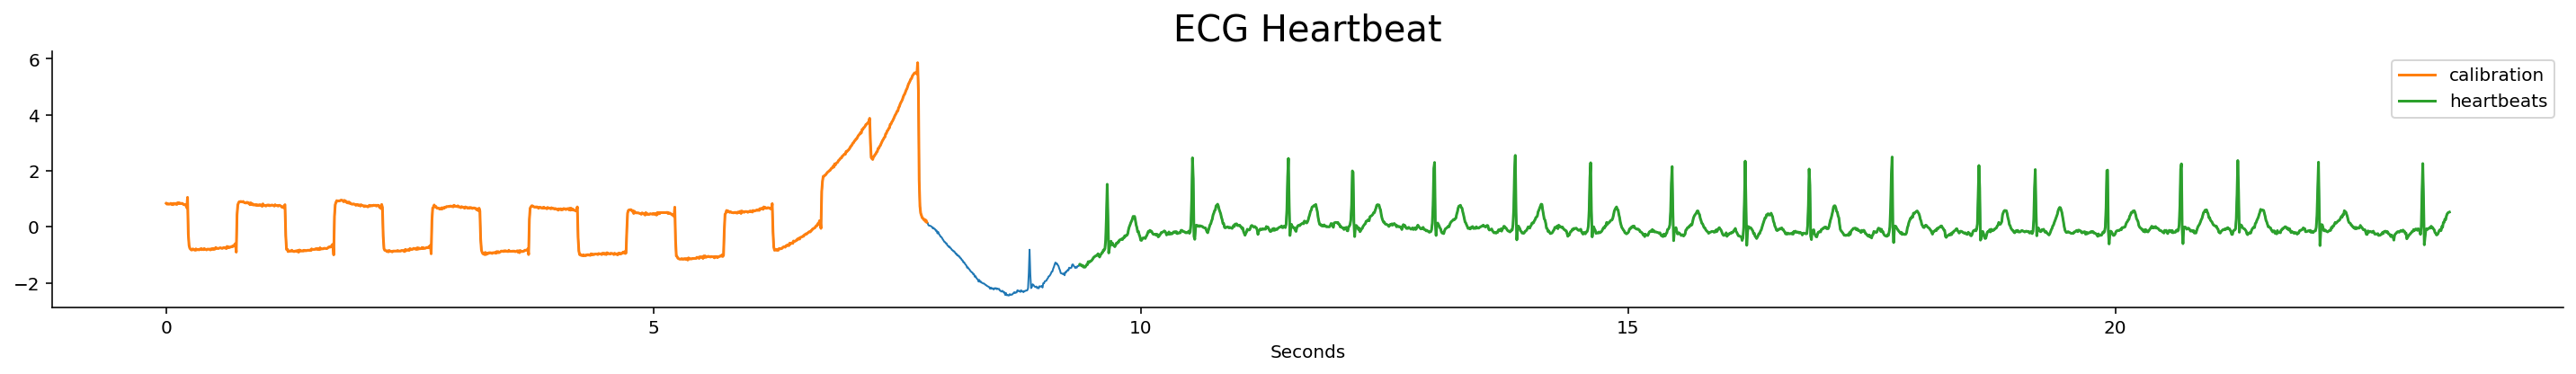

In [2]:
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

# Known Motifs

There are two motifs: A calibration signal with $6$ repetitions, and the actual heartbeats with around $16$ occurrences.

## First, we learn the motif length l

We find aminimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:00<00:00, 50.77it/s]


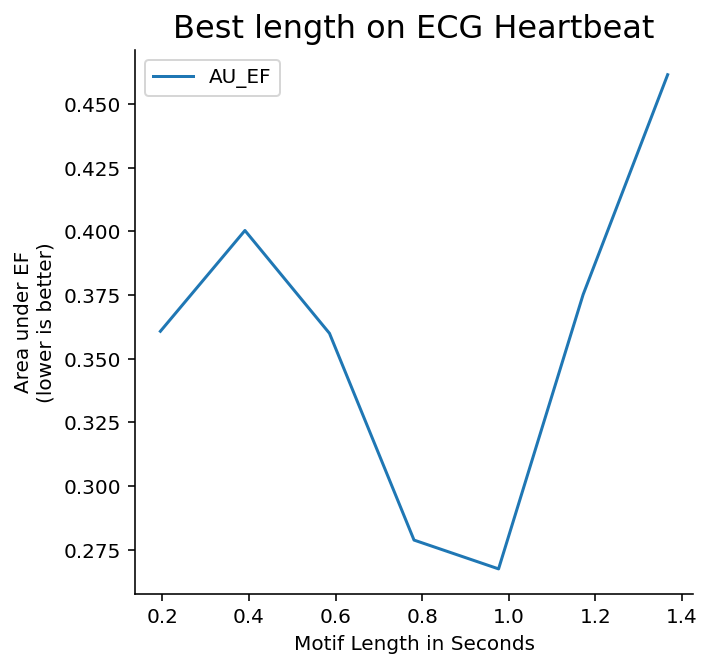

Best motif length 0.9765625 seconds


In [3]:
ks = 20
length_range = np.arange(25,200,25) 
motif_length = plot_motif_length_selection(
    ks, series, file, 
    motif_length_range=length_range, ds_name=ds_name)

print ("Best motif length", series.index[motif_length], "seconds")

## Next, we learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:01<00:00, 14.16it/s]


Chosen window-size: 125 Elbow Points [ 6  9 16]
Filtered Elbow Points [6, 16]


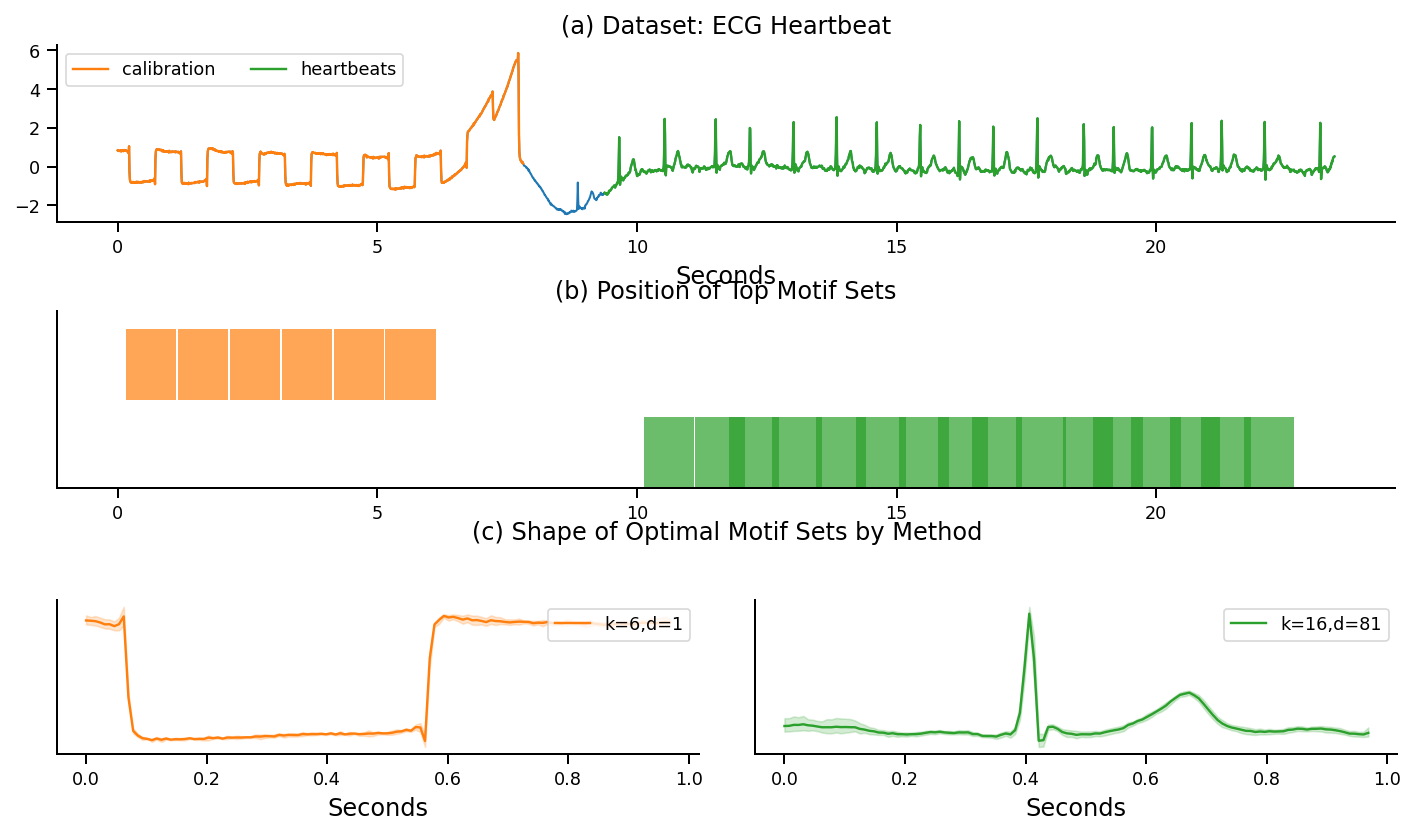

In [4]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    ds_name=ds_name, 
    motif_length=motif_length,
    ground_truth=df_gt)

<hr>

# Dataset: Muscle Activation Dataset

The Muscle Activation dataset was collected from professional in-line speed skating on a large motor driven treadmill with Electromyography (EMG) data of multiple movements. It consists of $29.899$ measurements at $100Hz$ corresponding to $30s$ in total. The known motifs are the muscle movement and a recovery phase.

### References
- [1] https://link.springer.com/content/pdf/10.1007/s10618-007-0070-1.pdf
- [2] http://www.cs.ucr.edu/~eamonn/iSAX/iSAX.html

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


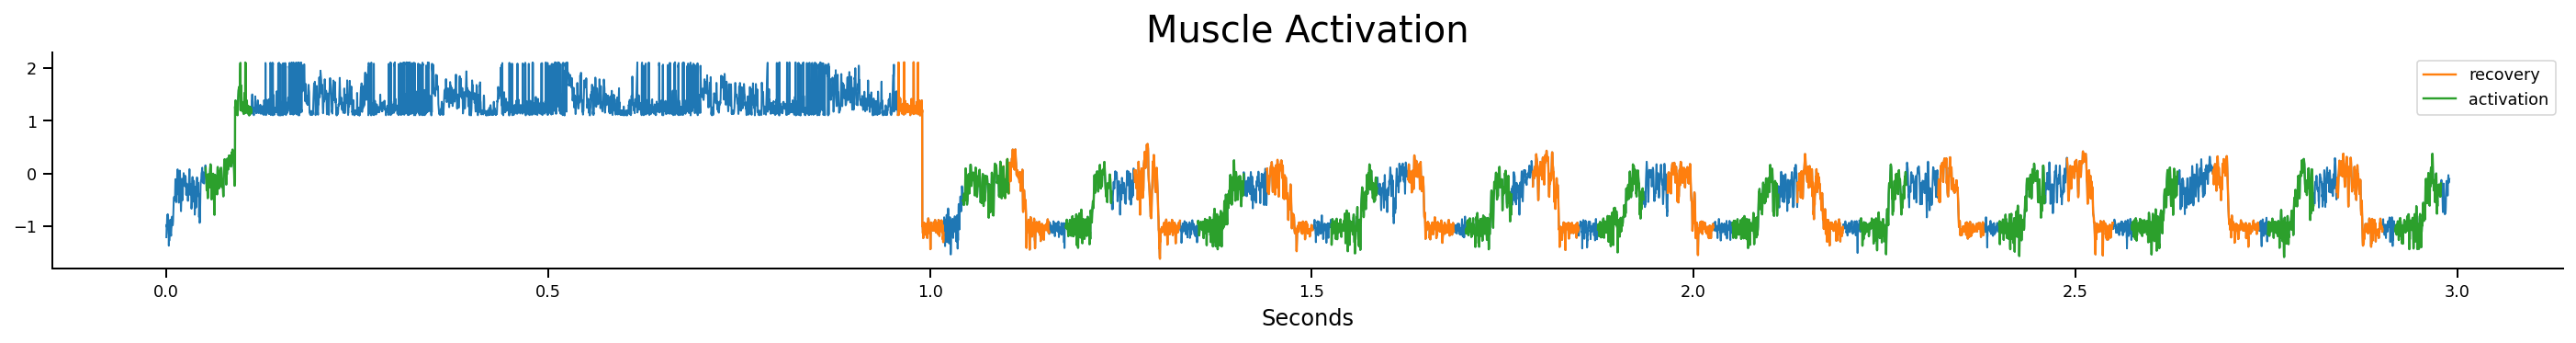

In [5]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"

series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

# Known Motifs

The known motifs are the muscle movement activation and a recovery phase of the Gluteus Maximus muscle and have $13$ and $12$ occurrences, respectively.

## First, we learn the motif length l

We find a minimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.98it/s]


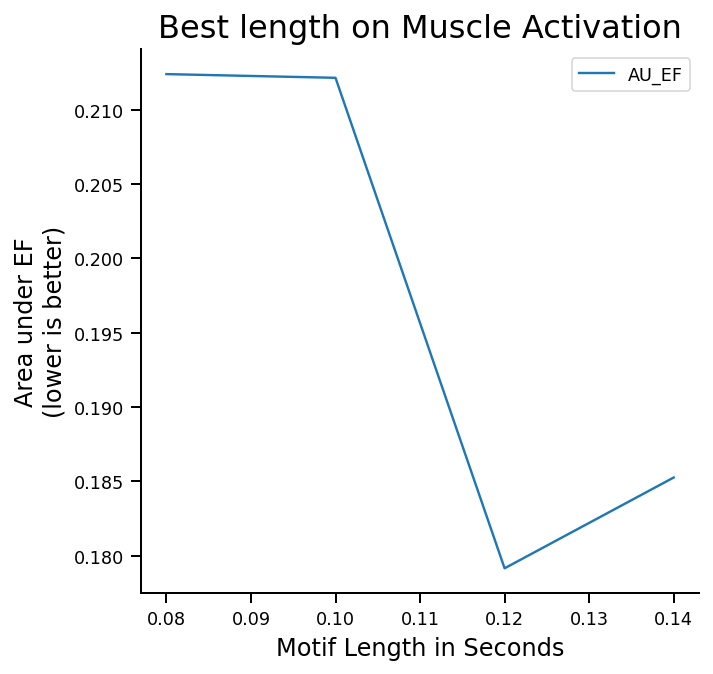

Found motif length 600


In [6]:
k = 15
length_range = np.arange(400,701,100) 

motif_length = plot_motif_length_selection(
    k, series, file, length_range, ds_name=ds_name)

print ("Found motif length", motif_length)

## Top-1 k-Motiflets

We find the recovery phase with $12$ occurences as TOP-1 motif

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:12<00:00,  1.07it/s]


Chosen window-size: 600 Elbow Points [ 9 12]
Filtered Elbow Points [12]


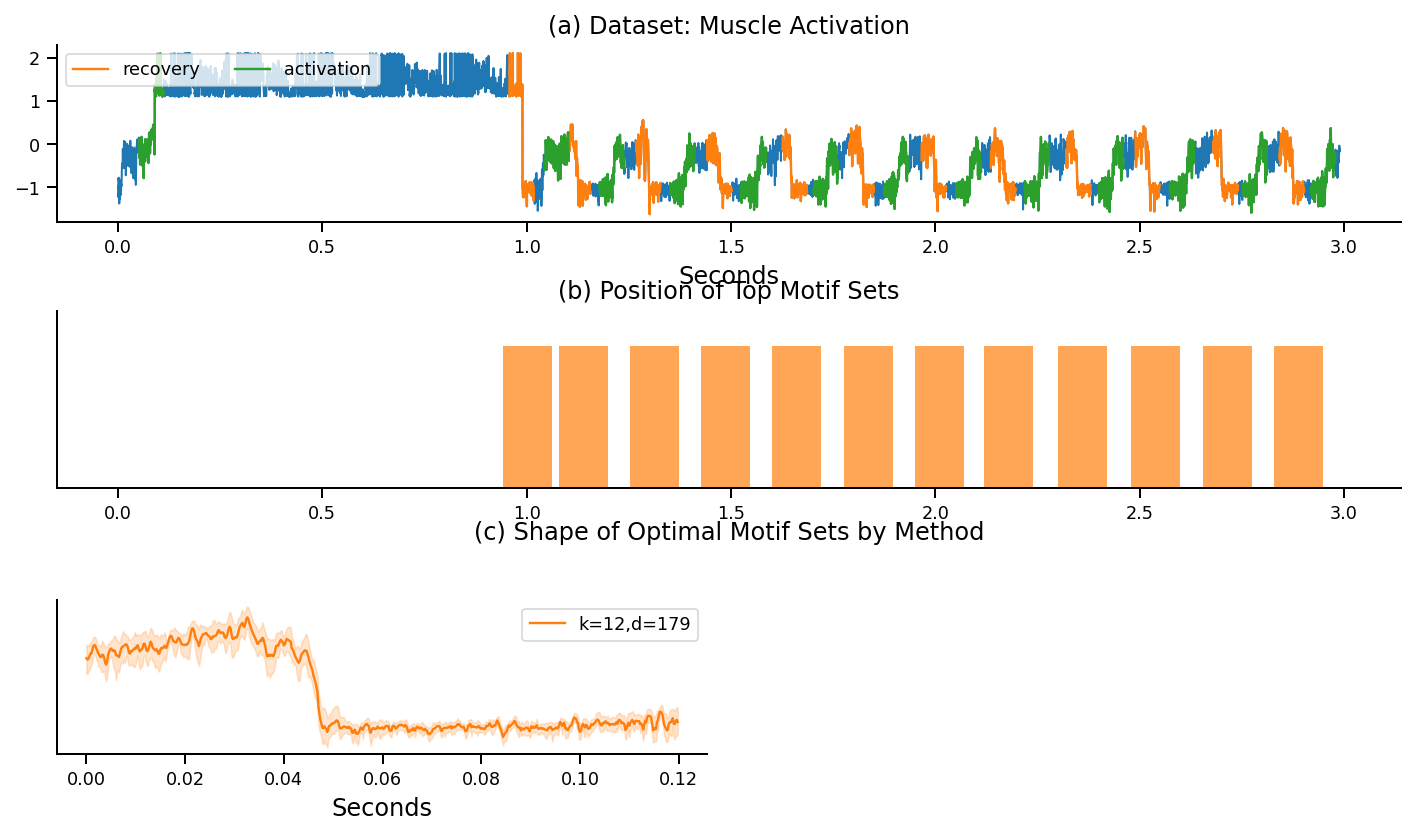

In [7]:
dists, candidates, elbow_points = plot_elbow(
    k, series, file, ds_name=ds_name,
    motif_length=motif_length, ground_truth=df_gt)

## Top-2 k-Motiflets

We may also find the activation phase with $12$ occurences as TOP-2 motif

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.68it/s]


Chosen window-size: 600 Elbow Points [ 8 11]
Filtered Elbow Points [11]


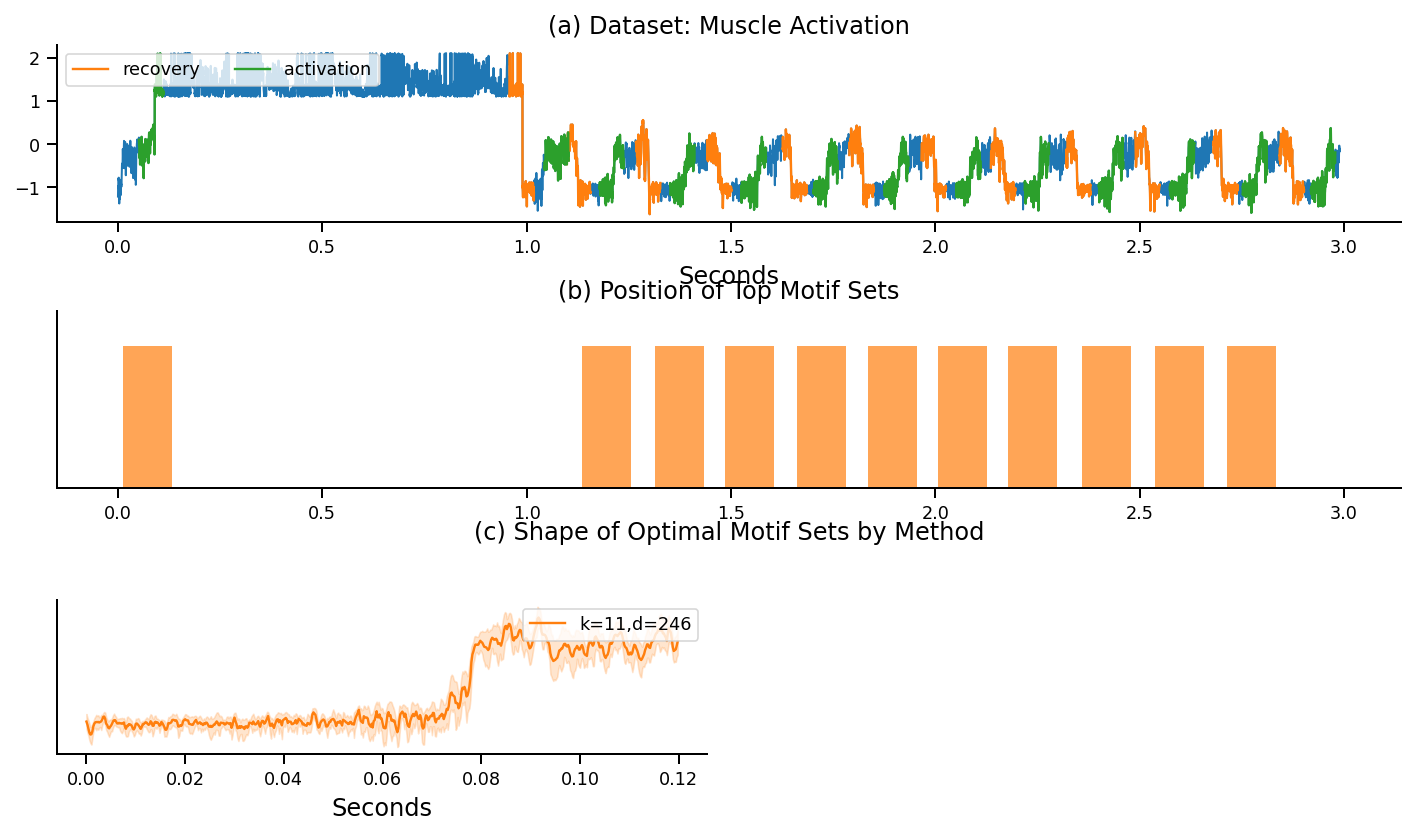

In [8]:
dists2, candidates2, elbow_points2 = plot_elbow(
    k, series, file, ds_name=ds_name, 
    exclusion=candidates, motif_length=motif_length, ground_truth=df_gt)

<hr>

# Dataset: Physiodata - EEG sleep data
    
This Physiodata - EEG sleep dataset contains a recording of an afternoon nap of a healthy, nonsmoking person, between 20 to 40 years old. Data was recorded with an extrathoracic strain belt. The dataset consists of $269.286$ points at $100hz$ corresponding to $45min$. Known motifs are so-called sleep spindles and $k$-complexes.

### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


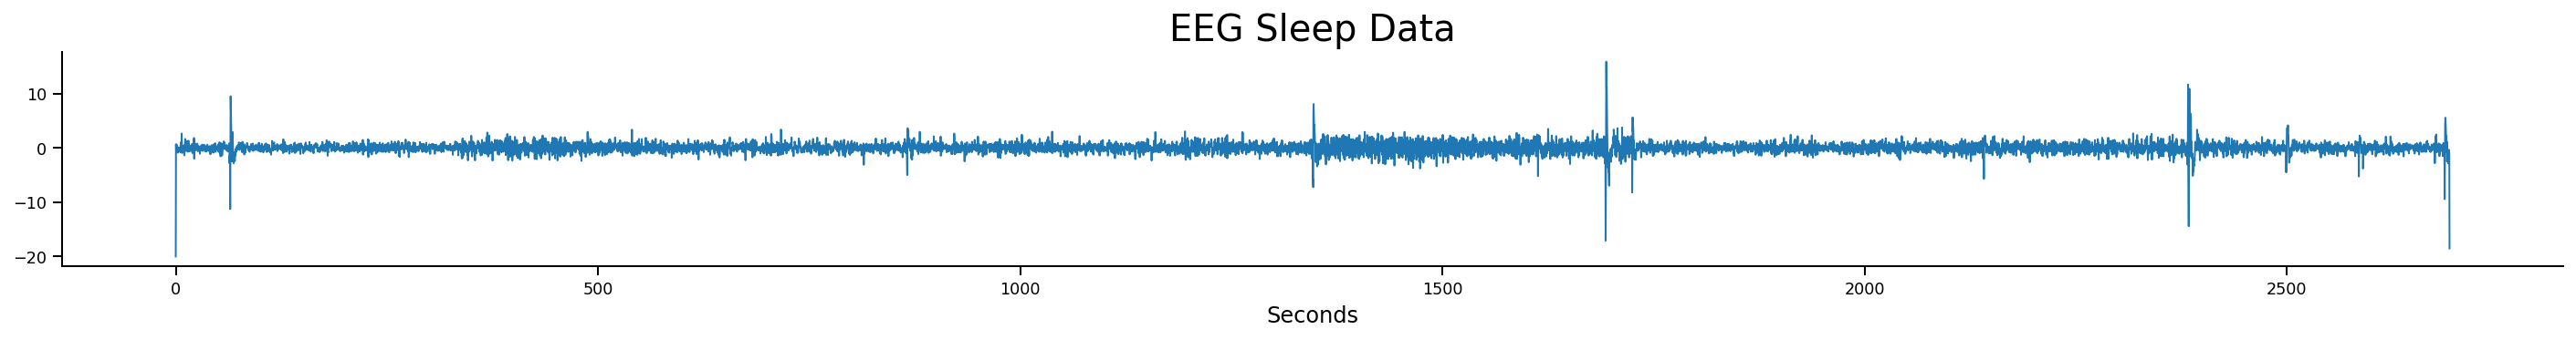

In [9]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

# Known Motifs in Stage 2 sleep phases


<img src="https://upload.wikimedia.org/wikipedia/commons/7/71/Stage2sleep_new.svg">

This data set contains two main motifs: the K-Complex and  sleep spindles, two characteristic markers of stage 2 sleep.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.55it/s]


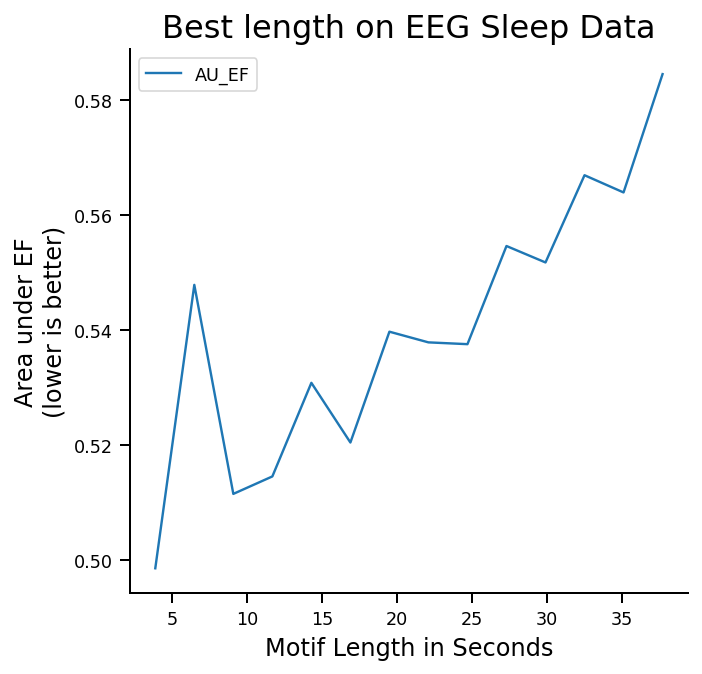

In [10]:
ks = 20

length_range = np.arange(15,151,10)
motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

motif_length=25


The dataset has many minima. We chose $l=25$ in the following, as it is a good value for both interesting motifs.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: 
sleep spindles with k=15 repetitions and K-komplexes with k=13 repetitions.

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:16<00:00,  1.08it/s]


Chosen window-size: 25 Elbow Points [ 7 13 15]
Filtered Elbow Points [7, 13, 15]


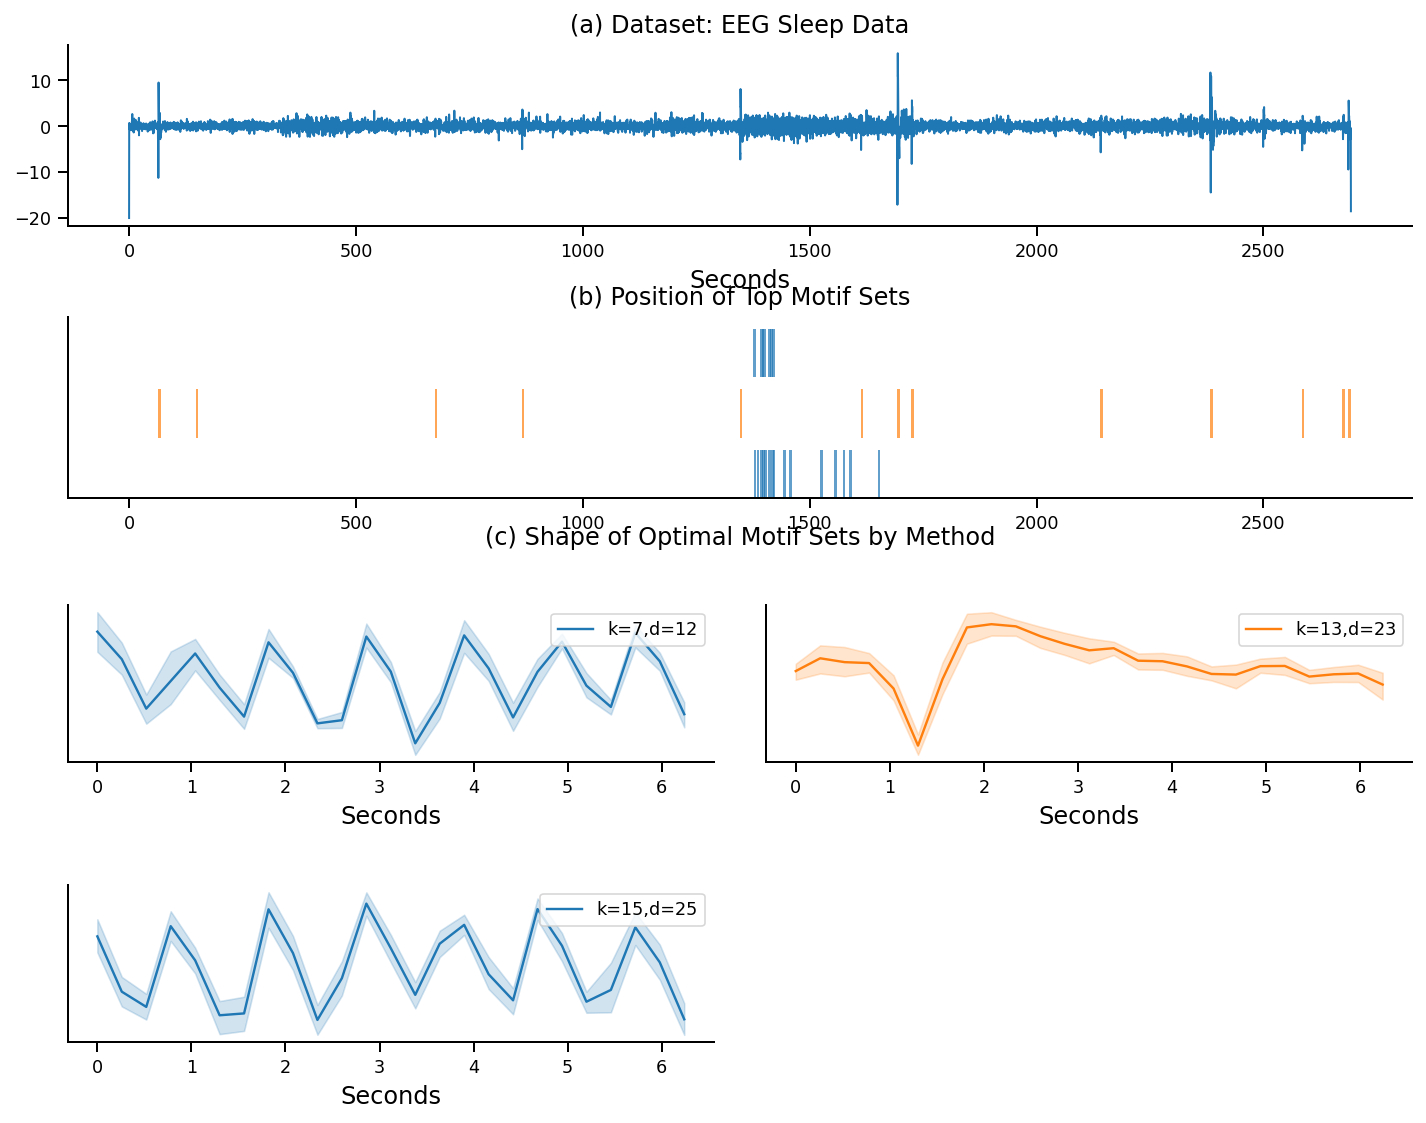

In [11]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name)

<hr>

# Dataset: Winding

Industrial Winding Process is a snapshot of a process where a plastic web is unwound from a first reel (unwinding reel), goes over the second traction reel and is finally rewound on the the third rewinding reel. The recordings correspond to the traction of the second reel angular speed. The data contains $2.500$ points sampled at $0.1s$, corresponding to $250s$.

### References 
- [1] https://homes.esat.kuleuven.be/~tokka/daisydata.html
- [2] https://grammarviz2.github.io/grammarviz2_site/morea/motif/experience-m1.html

Dataset Original Length n:  2499
Dataset Sampled Length n:  2499


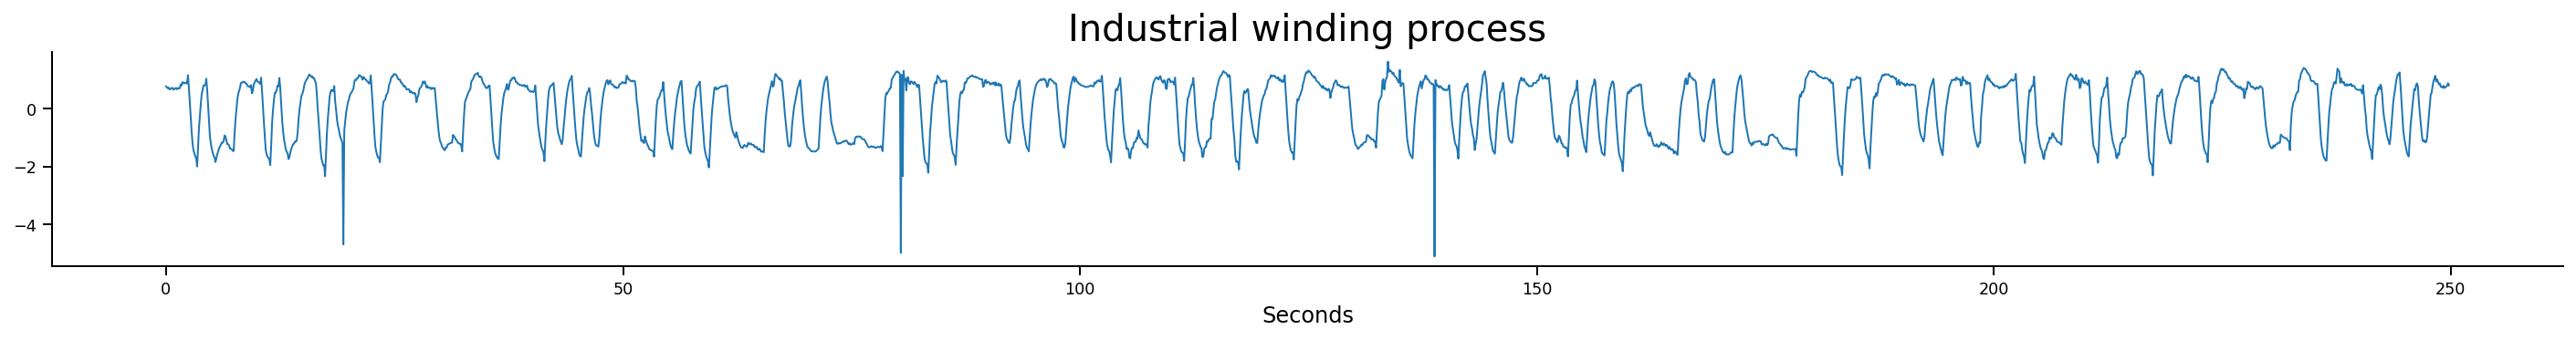

In [12]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

# Known Motifs

 No documented motifs exist.

## First, we learn the motif length l

We find aminimum around $l=6s$, equal to 60 data points.

Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 262.88it/s]


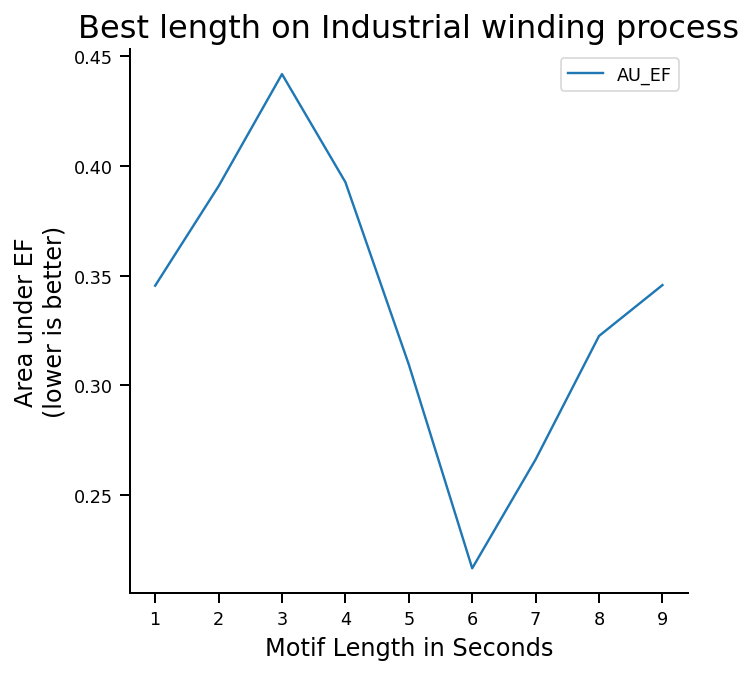

In [13]:
ks = 12
length_range = np.arange(10,100,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# Top-1 Motiflets

Compute ks: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 61.05it/s]


Chosen window-size: 60 Elbow Points [ 3  6 10]
Filtered Elbow Points [6, 10]


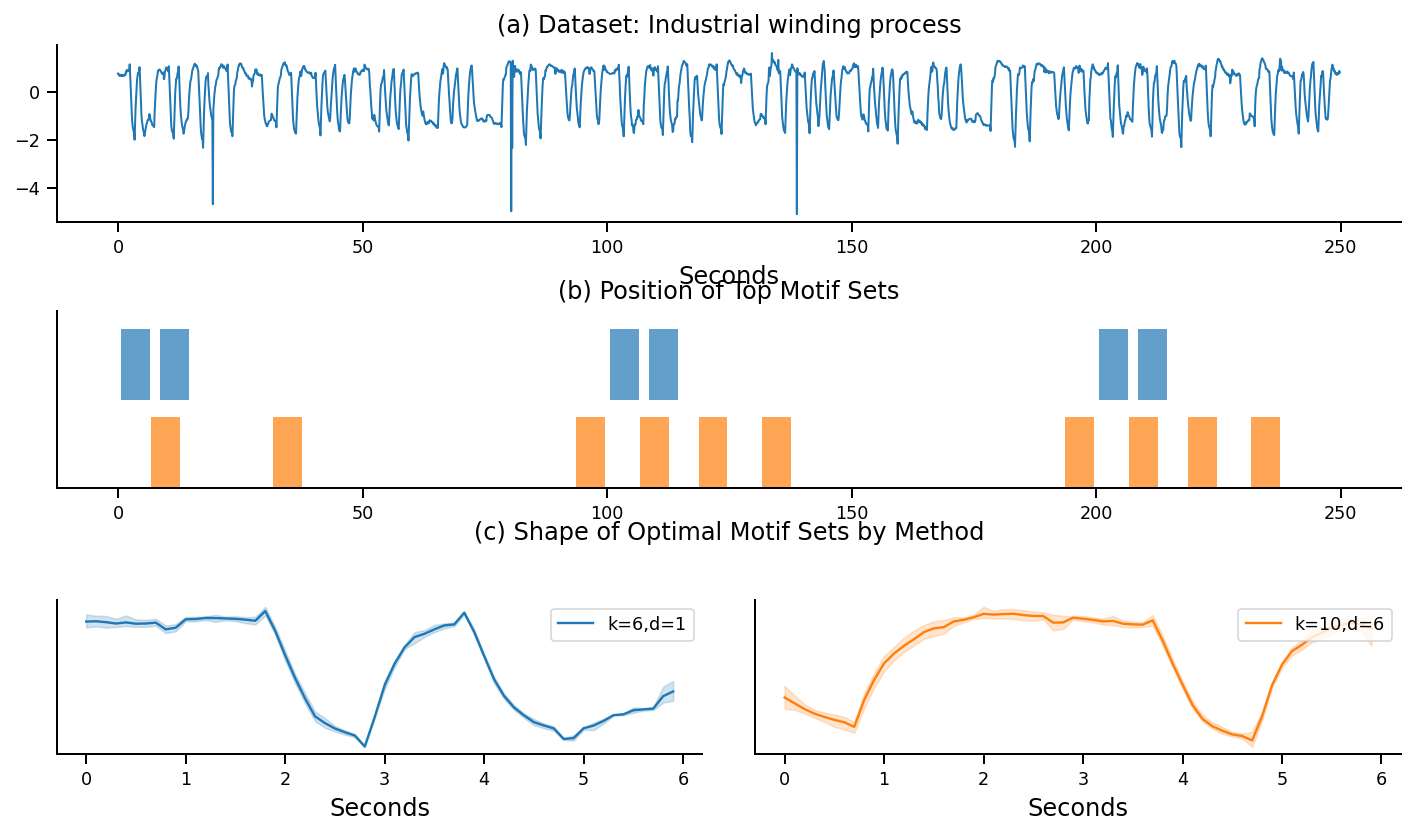

In [14]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name)

# Top-2 Motiflet

Compute ks: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 48.13it/s]


Chosen window-size: 60 Elbow Points [3 6 9]
Filtered Elbow Points [3, 6, 9]


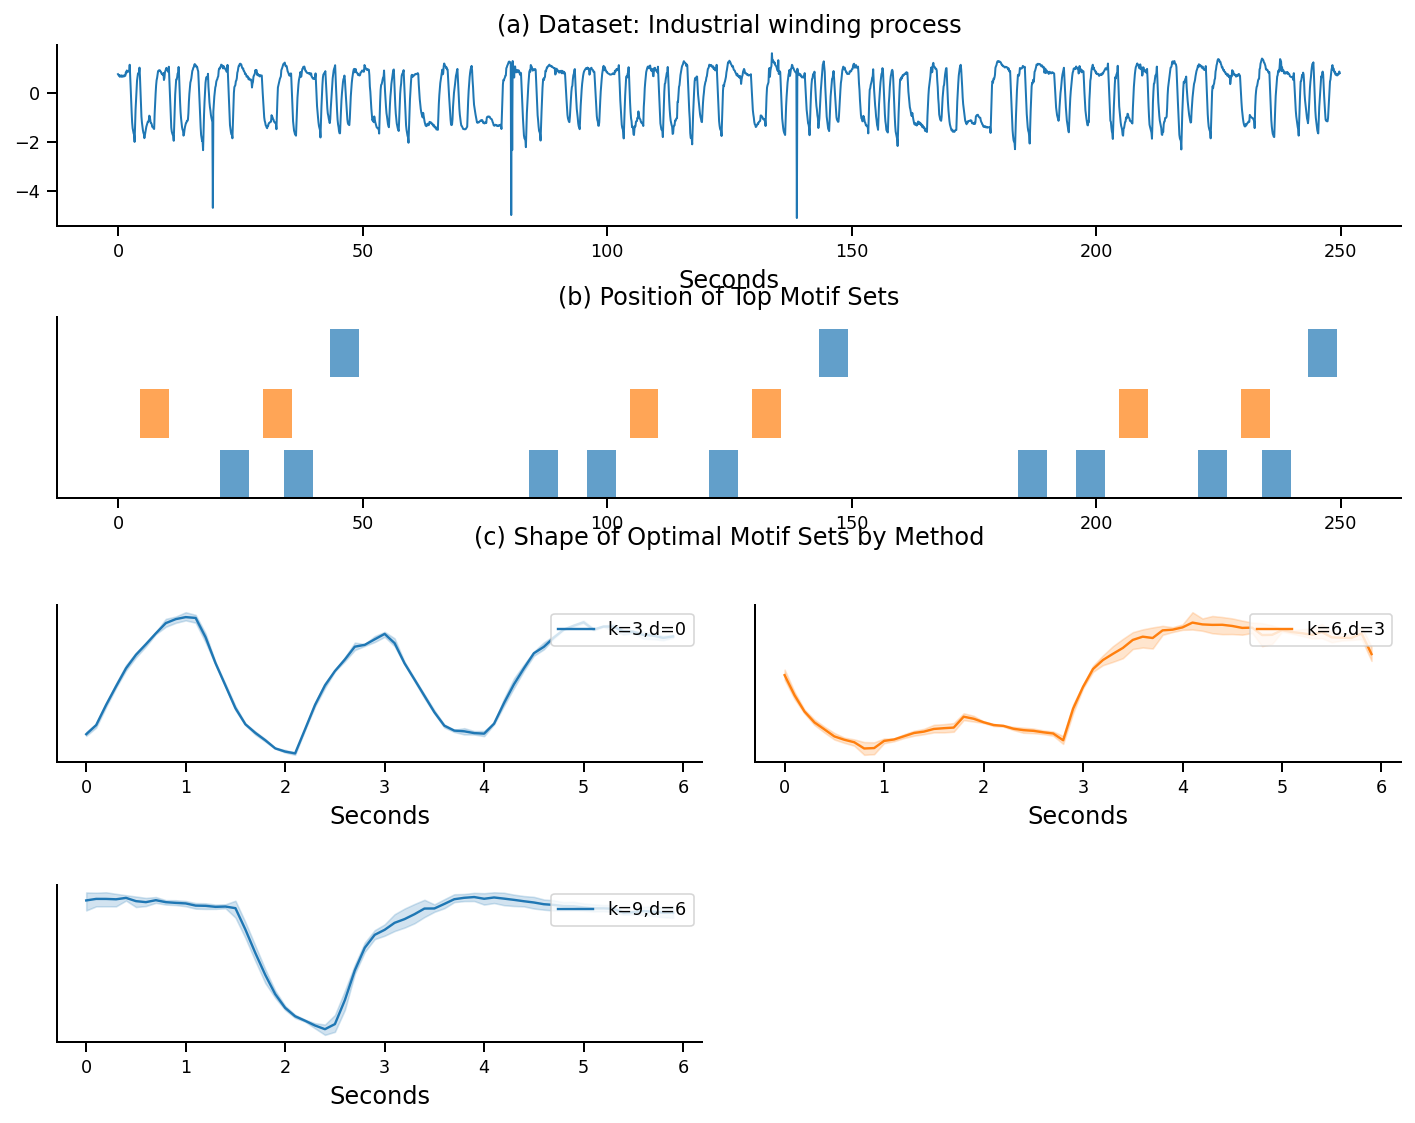

In [15]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, 
    exclusion=candidates, ds_name=ds_name)

<hr>

# Dataset: fNIRS Brain Imaging

Functional near-infrared spectroscopy (fNIRS) contains brain imaginary data recorded at $690nm$ intensity. There are $208.028$ measurements in total. The data is known to be a difficult example, as it contains four motion artifacts, due to movements of the patient, which dominate MD.

## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

Dataset Original Length n:  10401
Dataset Sampled Length n:  10401


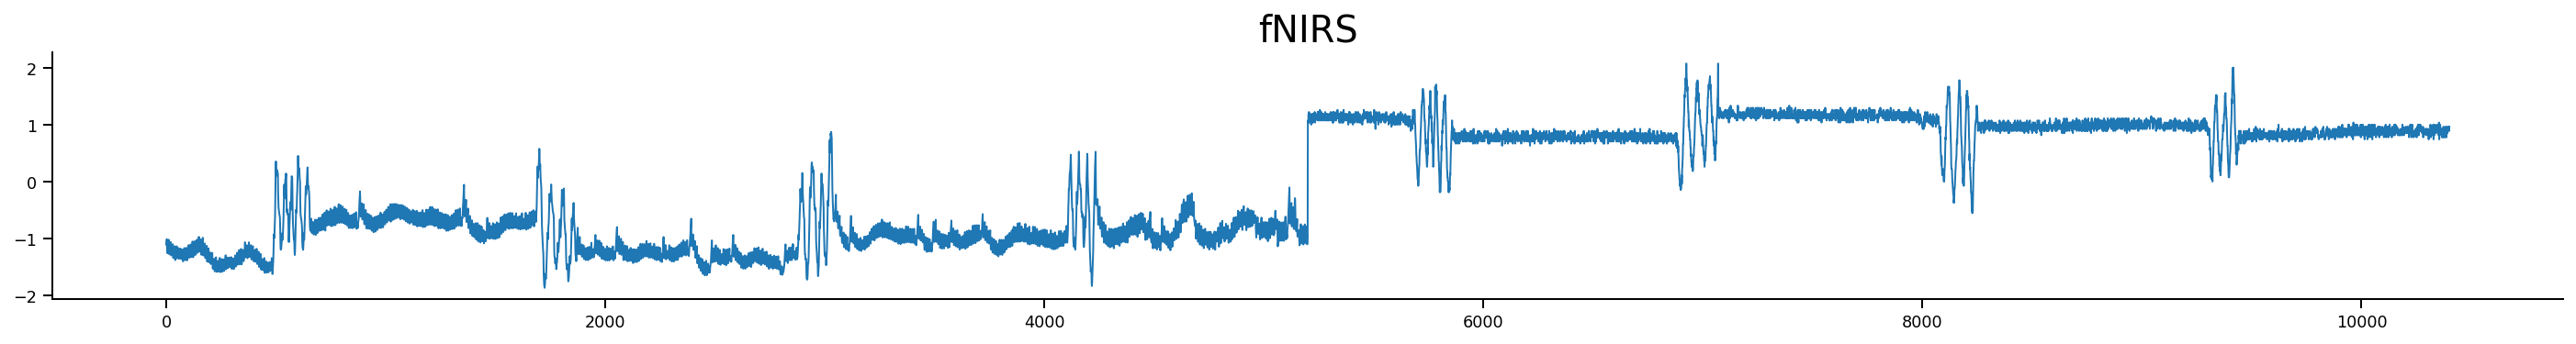

In [16]:
file = "fNIRS_subLen_600.csv" 
ds_name="fNIRS"
series = ml.read_dataset_with_index(file) 
#series = series[:5000]
plot_dataset(file, series, ds_name=ds_name)

## Motif Length Selection

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.15it/s]


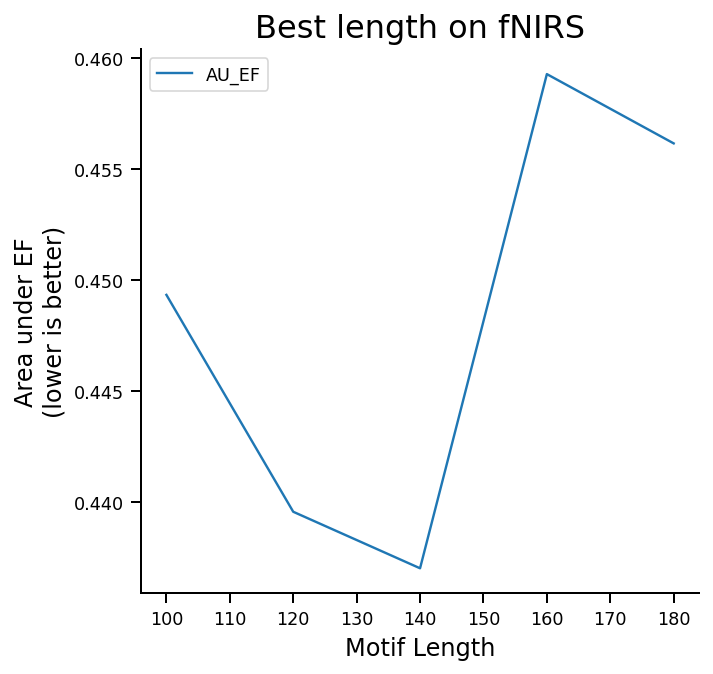

Found motif length 140


In [17]:
ks = 20
length_range = np.arange(100,200,20)
motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, 
    ds_name=ds_name)

print ("Found motif length", series.index[motif_length])

# Top k-Motiflets

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:09<00:00,  1.81it/s]


Chosen window-size: 140 Elbow Points [ 4 10 12 18]
Filtered Elbow Points [4, 12, 18]


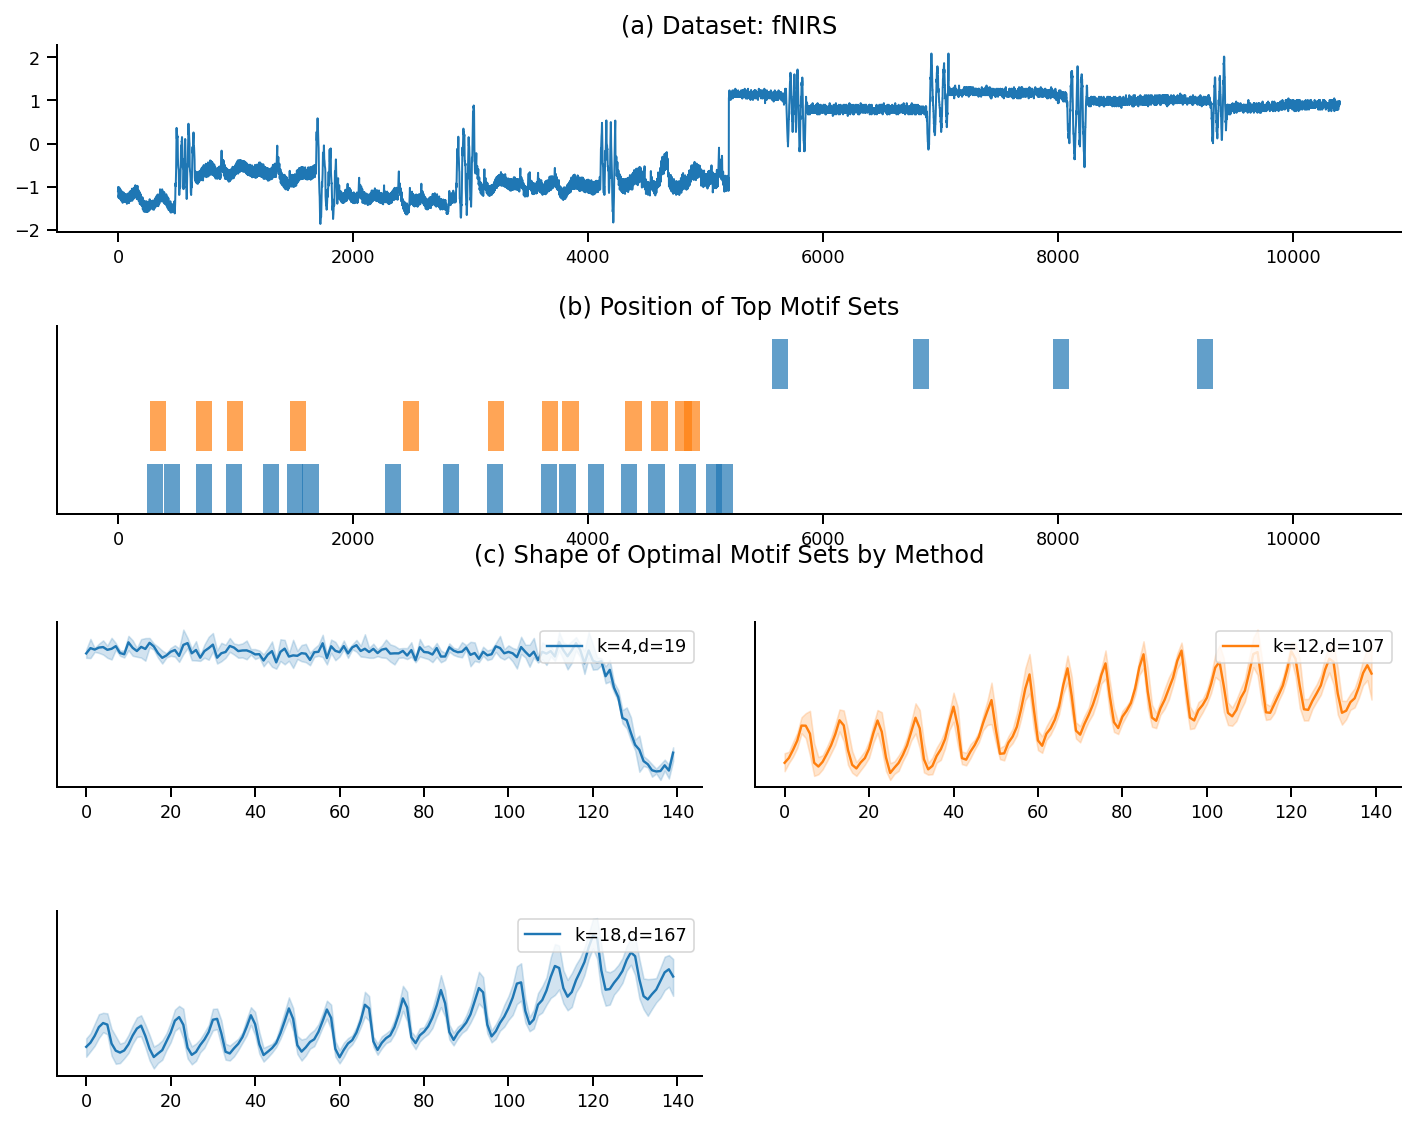

In [18]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name, filter=True)

<hr>
<hr>
<hr>
<hr>

# Datasets not shown in Paper

<hr>
<hr>
<hr>
<hr>

# Dataset:  Power demand by ECN

<!---

> shows the power demand data of a research facility (i.c. ECN)
> Yet, the variation over the week is harder to discern and the day-patterns of Saturdays and Sundays are obscured. [1]

- Officehoursarefollowedstrictly.Mostpeoplearrivebetween 8:30 and 9:00 am, and leave between 4:00 and 5:00 pm. Fur- thermore, in the morning the number of employees present is slightly higher than in the afternoon.
- On Fridays and in the summer fewer people are present (clus- ter 722);
- OnFridaysinthesummerevenfewerpeoplearepresent(clus- ter 718);
- Intheweekendandatholidaysonlyveryfewpeoplearework- ing (cluster 710): security and fire brigade;
- Holidays in the Netherlands in 1997 were January 1st, March 28th, March 31st, April 30th, May 5th, May 8th, May 19th, December 25th and 26th.
- SchoolvacationsarevisibleinSpring(May3rdtoMay11th), in Autumn (October 11th to October 19th), and in Winter (De- cember 21th to December 31st);
- Many people take a day off after a holiday (cluster 721);
- On December 5th many people left at 4:00 PM. Dutch peo- ple will immediately know the explanation: On this day we celebrate Santa Claus and are allowed to leave earlier!

Mi 1.1.97 - Mi 31.12.97 0 - 24 Uhr, 15 Minuten Interval
--> 
### References 
- [1] http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.105.685&rep=rep1&type=pdf

Dataset Original Length n:  35039
Dataset Sampled Length n:  11680


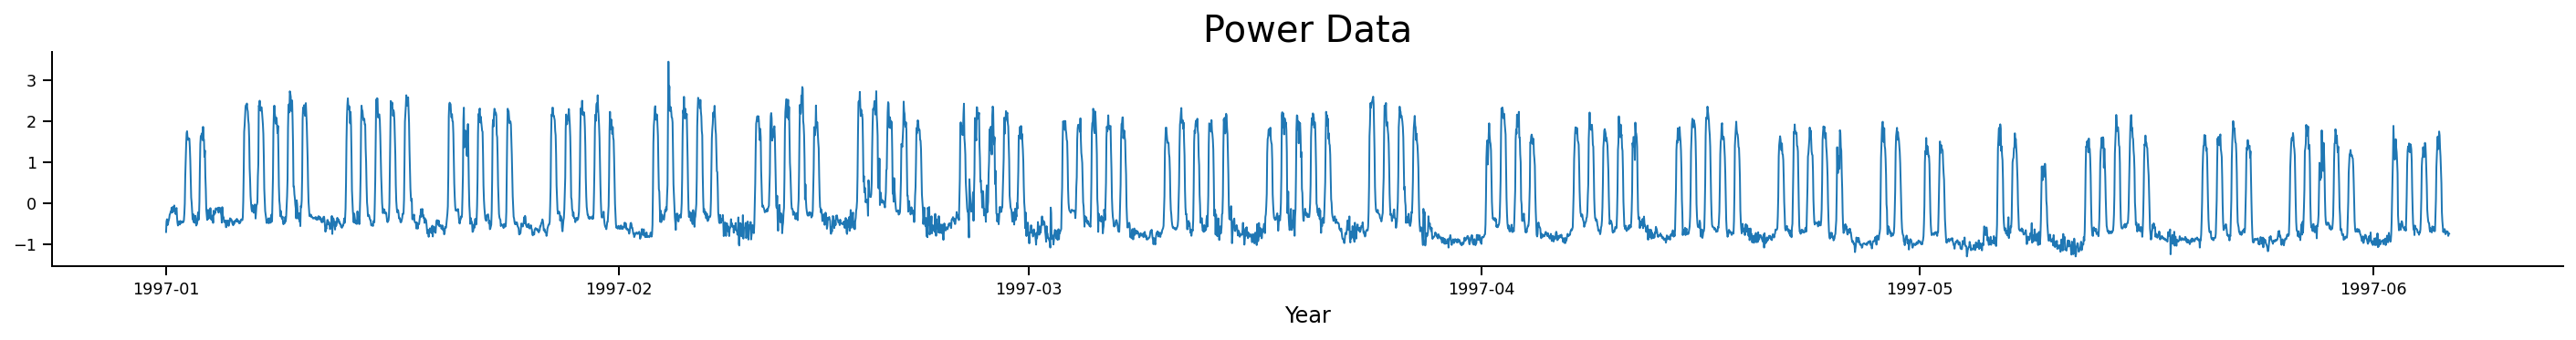

In [70]:
file = 'power_data.dat' # Dataset Length n:  ???
ds_name = "Power Data"

data = ml.read_dataset(file)
factor = 3

date_time_idx=(pd.date_range(start='1/1/1997', end='01/01/1998', freq ='15min'))
series = pd.Series(data = data, index=date_time_idx[::factor][:len(data)])
series.index.name = 'Year'
series = series[:5000]

plot_dataset(file, series, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.26it/s]


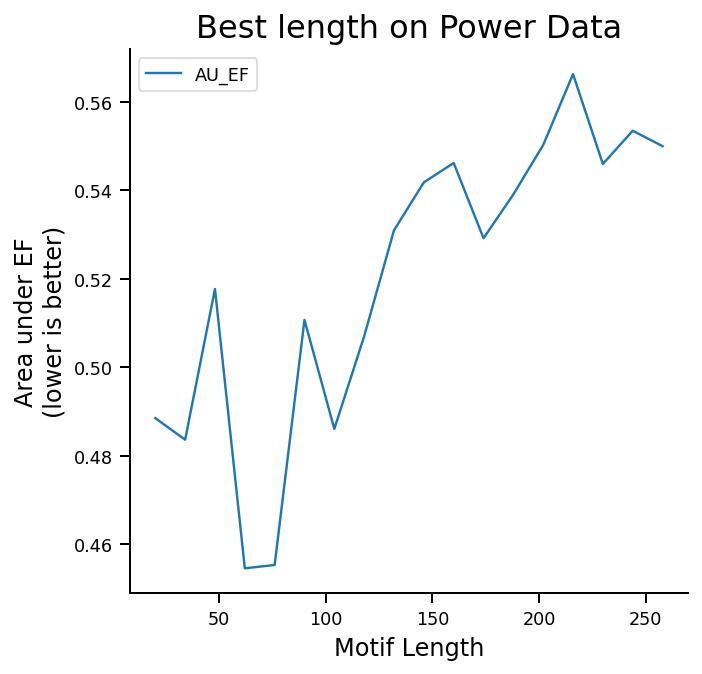

In [20]:
ks = 20
length_range = np.arange(20,261,14)
motif_length = plot_motif_length_selection(
    ks, data, file, motif_length_range=length_range,ds_name=ds_name)

# Weekly pattern

<!--
- Holidays in the Netherlands in 1997 were January 1st, March 28th, March 31st, April 30th, May 5th, May 8th, May 19th, December 25th and 26th.

- School vacations are visible in Spring(May3rdtoMay11th), in Autumn (October 11th to October 19th), and in Winter (De- cember 21th to December 31st);

- Sa + SU no-one works
-->

Compute ks: 100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.53it/s]


Chosen window-size: 224 Elbow Points [6]
Filtered Elbow Points [6]


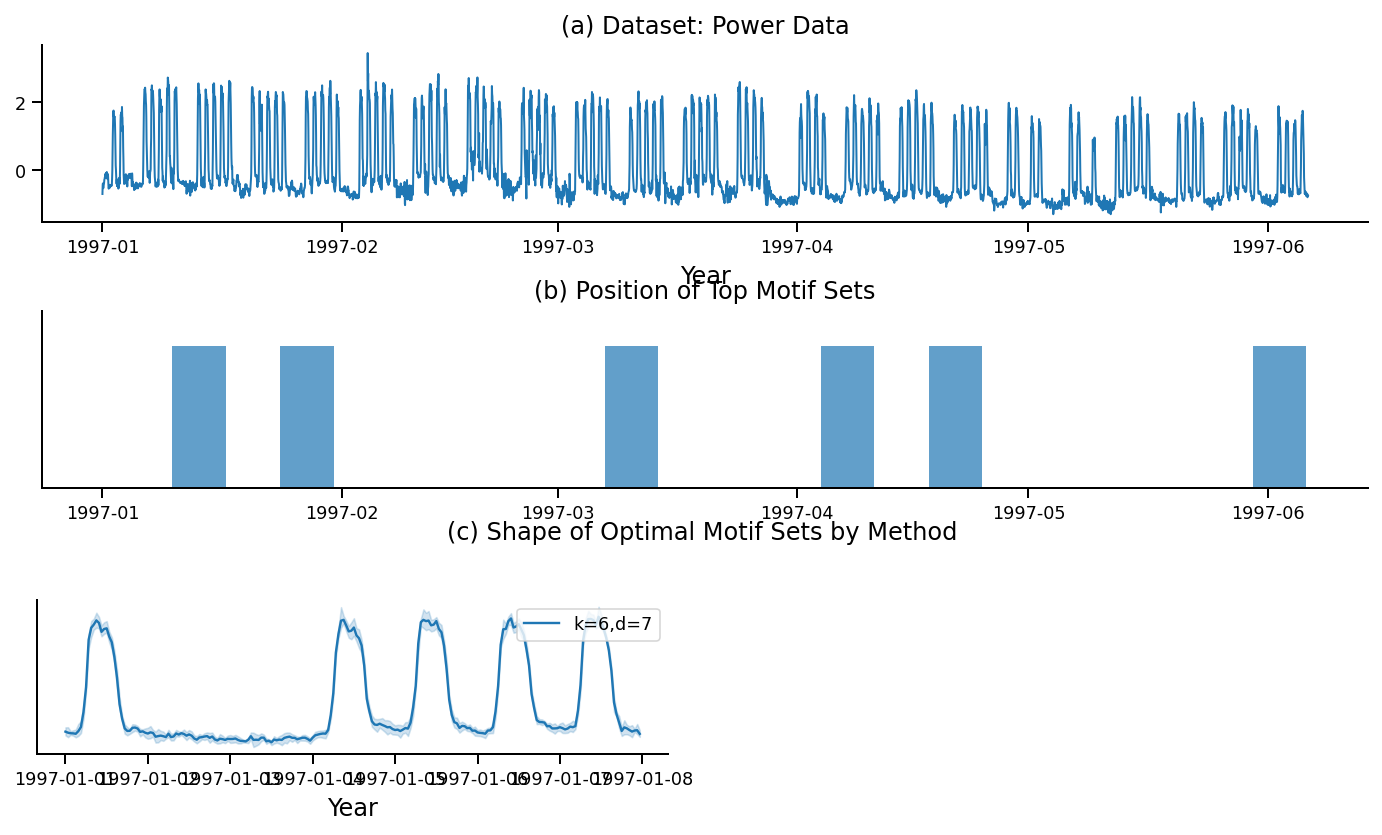

In [71]:
# week
weekly = int(96 * 7 / factor)
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=weekly, ds_name=ds_name)

<hr>

# Tide

<!--
> a time series of subtidal sea level fluctuations for Crescent City, which is located at latitude 410 4 5 ' N and longitude 1240 ll'W on the open coast of Northern California. Inside its harbor, a permanent tide gauge is maintained by the National Ocean Service (NOS). The gauge measures water levels every 6 minutes within a stilling well that consists of a vertical tube with small open- ings near the bottom. These openings admit the tides and lower-frequency fluctuations into the well, but suppress the higher-frequency fluctuations due to wind waves and swell. Periodic leveling surveys ensure that the reference level of the gauge remains constant relative to the surrounding land. The time series used here was collected from January 1980 to December 1991 and was reduced to hourly data by sub- sampling. The hourly data contain a 2-week gap in summer 1990 (filled with predicted tides and a local mean) and a few shorter gaps (filled by interpolation). 

> The MODWT analysis of subtidal sea level fluctuations at Crescent City shows that these fluctuations are strongest during the winter regime (November-March) and occur preferentially at the scales 4-16 days.
--> 
### References 
- [1] https://www.tandfonline.com/doi/pdf/10.1080/01621459.1997.10474042?casa_token=H6cMRWAX5QcAAAAA:Io48CiaQb-byC3qRrpMA0vvv4aJ4Jqe4rnp0w2JeJHs_sNxCcoibFNjrO0VsslwGM3lcxujga0eS


Dataset Original Length n:  8745
Dataset Sampled Length n:  8745


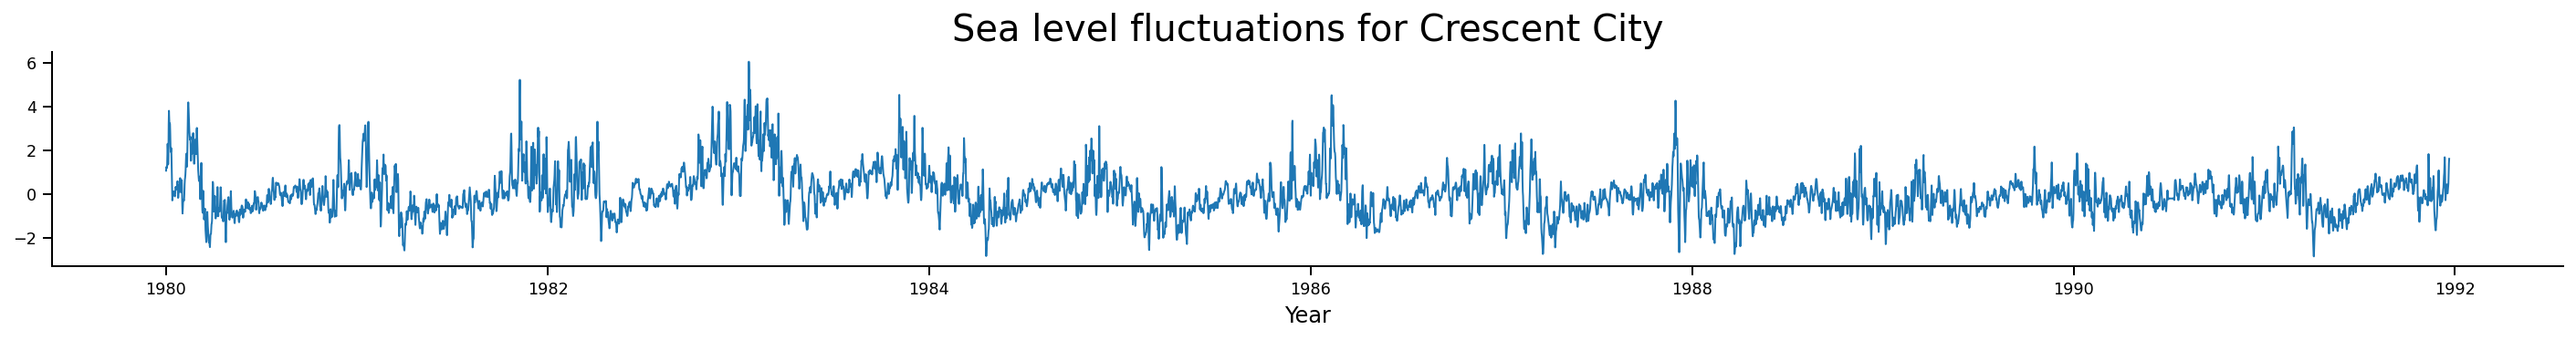

In [23]:
file = 'tide.dat' 
ds_name = "Sea level fluctuations for Crescent City"

data = ml.read_dataset(file)
date_time_idx=(pd.date_range(start='1/1/1980', end='01/01/1992', freq ='12H'))
series = pd.Series(data = data, index=date_time_idx[:len(data)])
series.index.name = 'Year'

plot_dataset(file, series, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 28/28 [00:08<00:00,  3.11it/s]


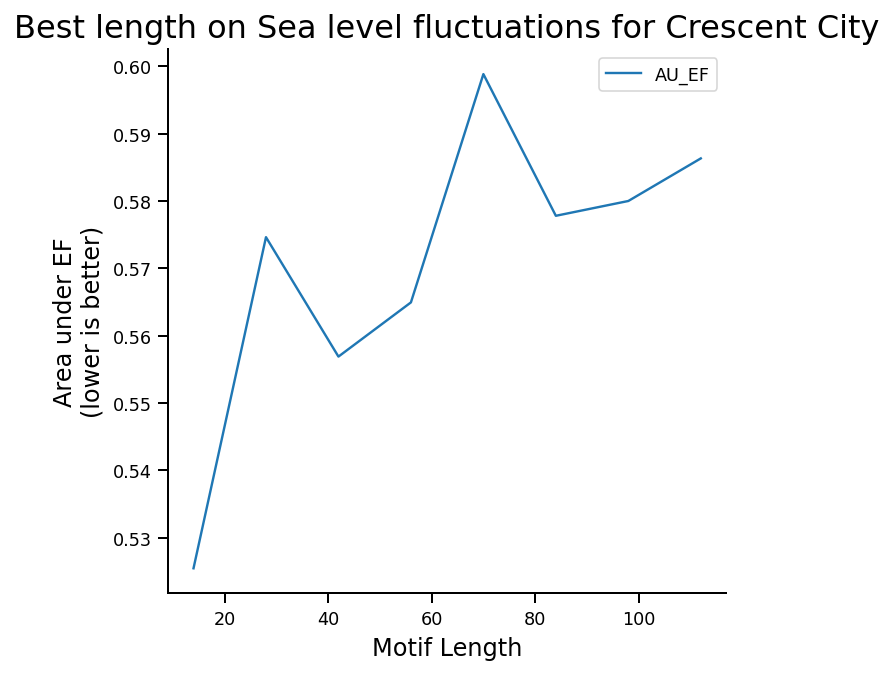

In [25]:
ks = 30
length_range = np.arange(14,8 * 14 + 1,14)

motif_length = plot_motif_length_selection(
    ks, series.values, file, 
    motif_length_range=length_range, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 28/28 [00:10<00:00,  2.59it/s]


Chosen window-size: 14 Elbow Points [ 4  6  8 12 15 18 22 26]
Filtered Elbow Points [15, 18, 26]


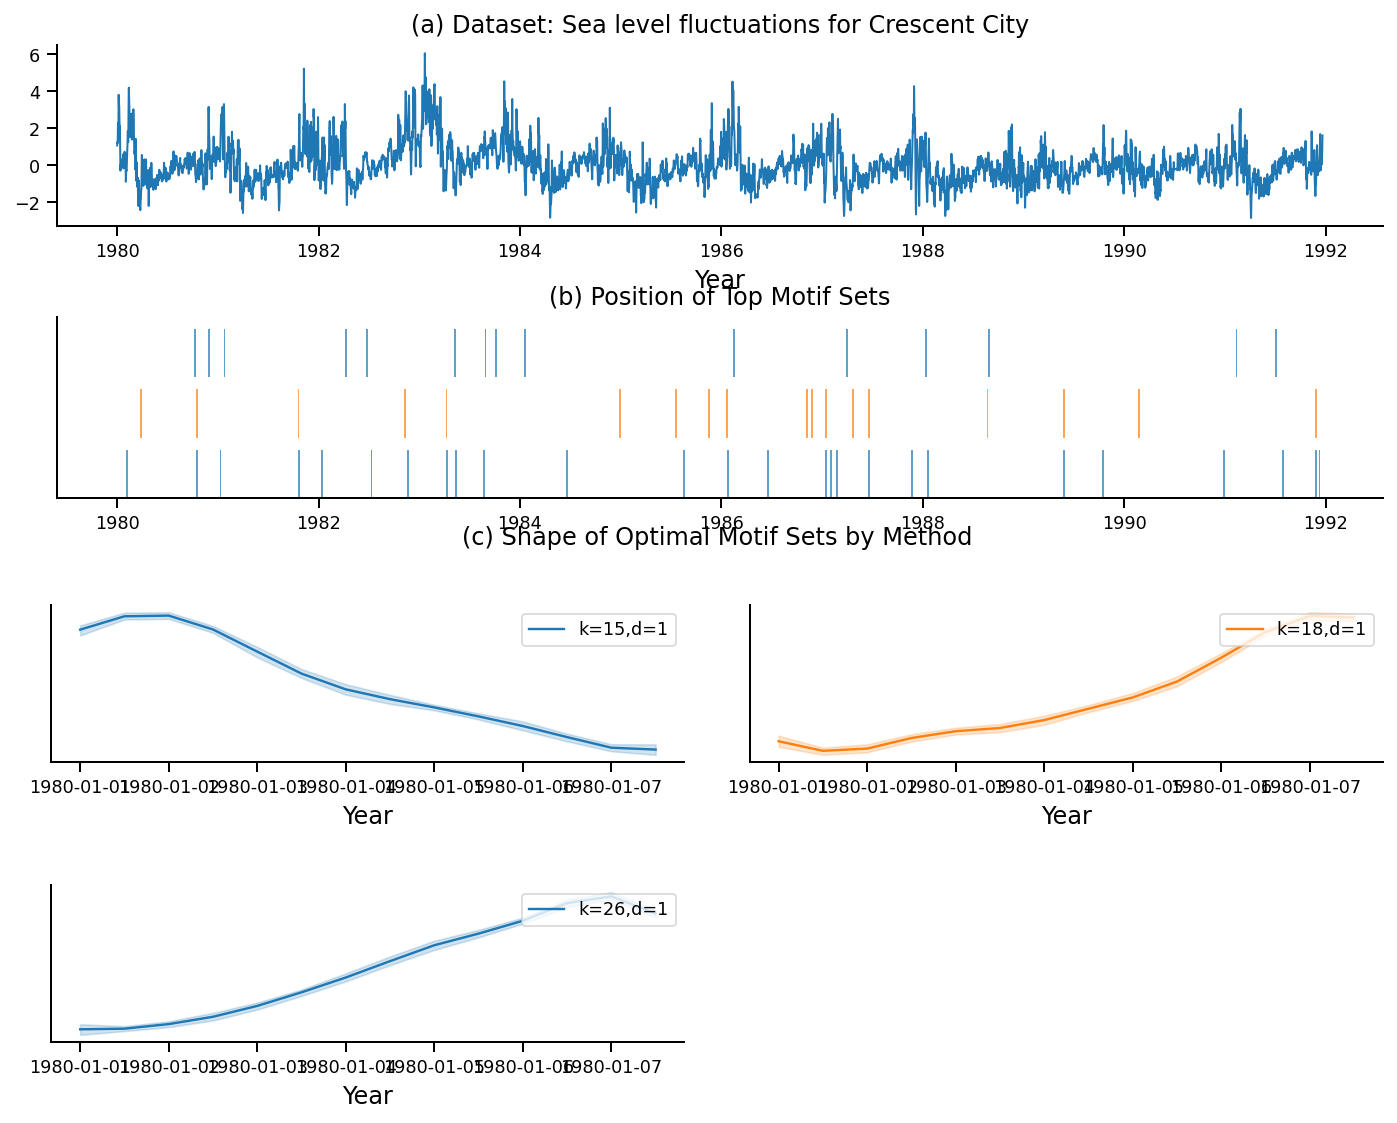

In [26]:
# 1 Weeks
motif_length = 2 * 7
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.45it/s]


Chosen window-size: 28 Elbow Points [ 6  8 10 15 22 24 26]
Filtered Elbow Points [8, 26]


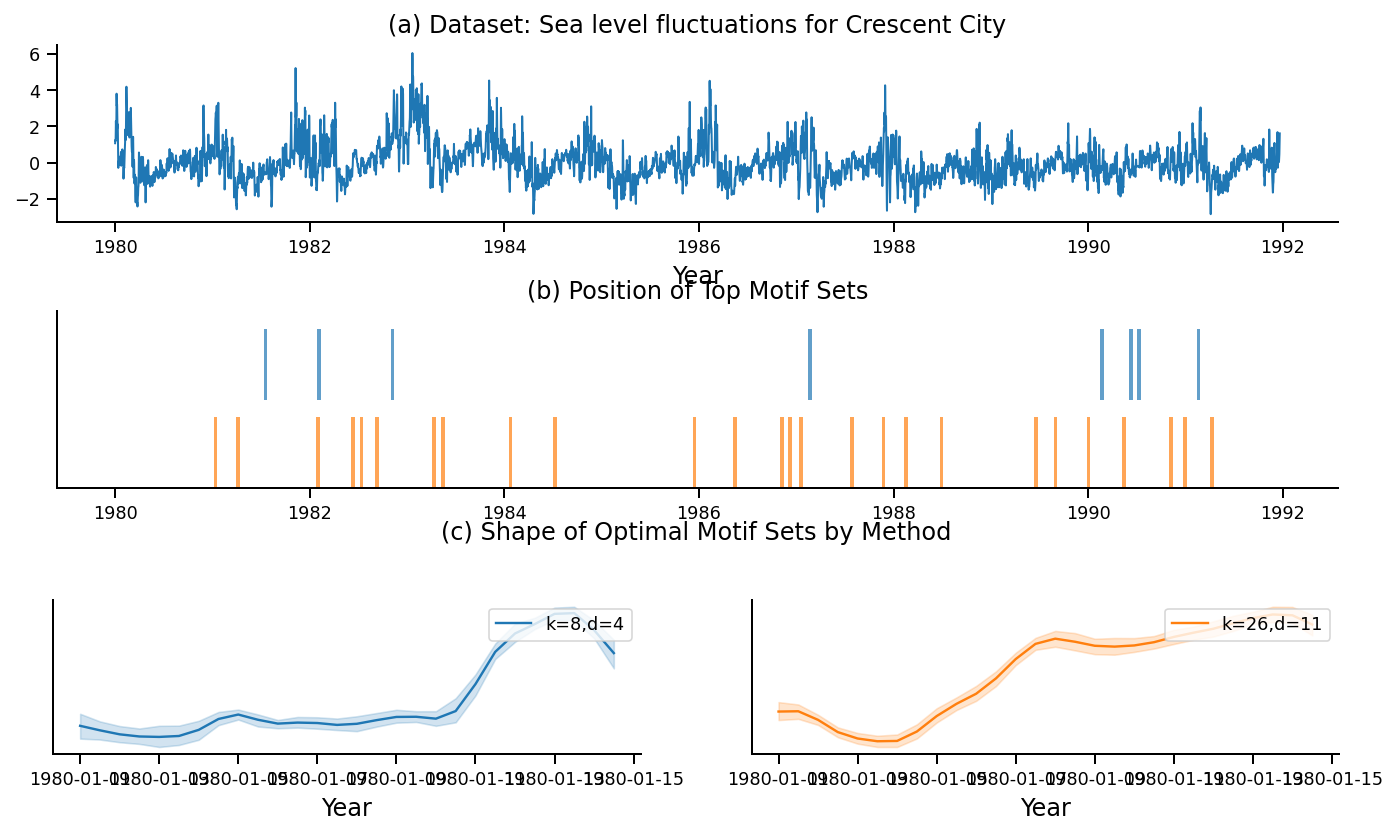

In [27]:
# 2 Weeks
motif_length = 2 * 7 * 2
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, ds_name=ds_name, idx=2)

Compute ks: 100%|██████████████████████████████████████████████████| 28/28 [00:30<00:00,  1.09s/it]


Chosen window-size: 56 Elbow Points [13 15 21 25]
Filtered Elbow Points [25]


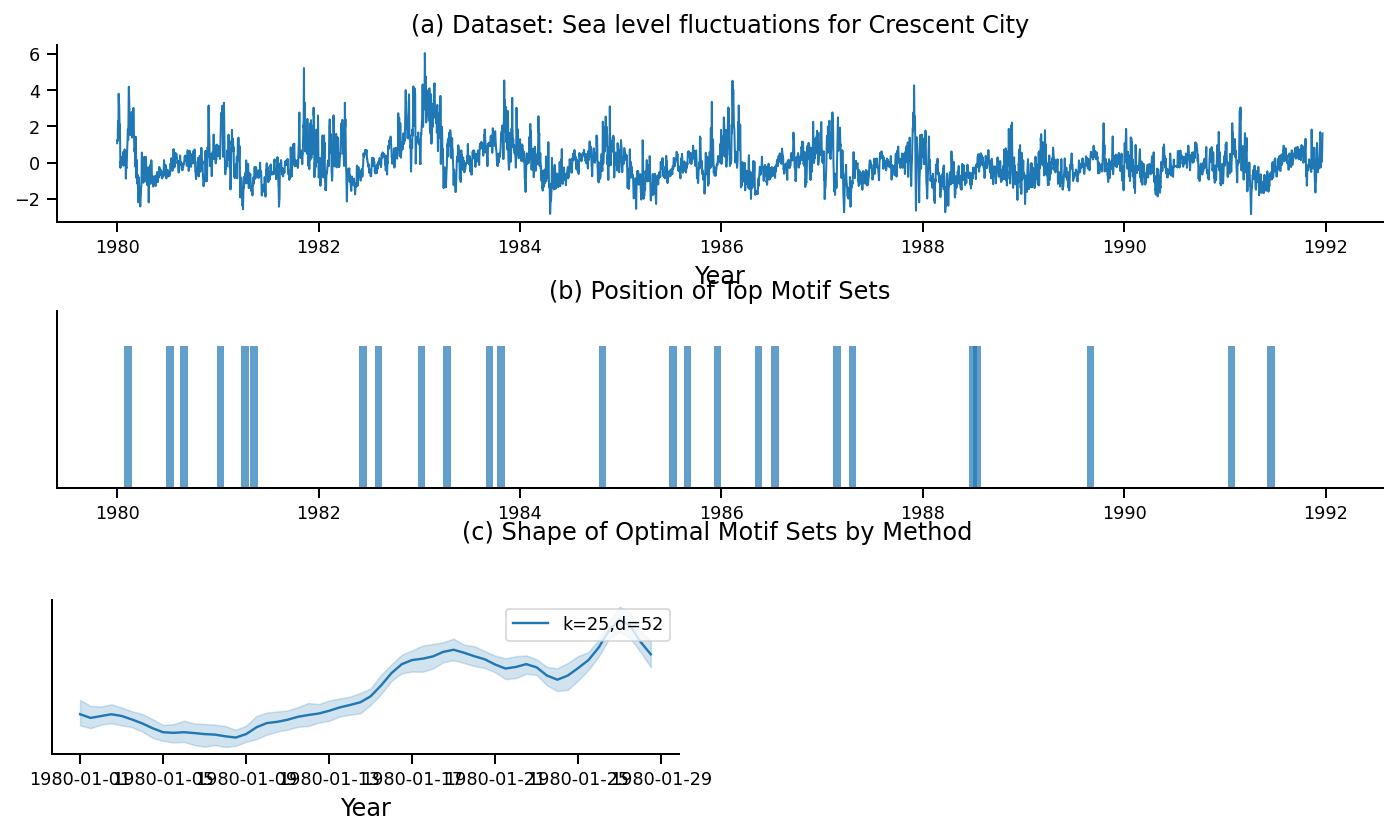

In [28]:
# 1 Mo = 4 Weeks
motif_length = 2 * 7 * 4
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, ds_name=ds_name, idx=3)

<hr>

# Personalised real-time Energy Feedback

<!--
> A basic wash cycle takes approximately half an hour (approximately 350 sample points). By setting motif length equal to one basic cycle, we can find a frequently repeating pattern, representing a wash cycle, as shown in Fig. 1 (Motif A). However, after running our algorithm, we also found one frequent motif (Motif B) of length 1534 (approximately 2.5 hours), and a rare motif (Motif C) of length 2791 (approximately 4.6 hours) that only happened a few times in the time series.

- 10 seconds interval??

-->

### References
- [1] https://arxiv.org/pdf/1802.04883.pdf
- [2] D. Murray, J. Liao, L. Stankovic, V. Stankovic, R. Hauxwell-Baldwin, C. Wilson, M. Coleman, T. Kane, and S. Firth. A data management platform for personalised real-time energy feedback. 8 2015.

Dataset Original Length n:  245151
Dataset Sampled Length n:  10215


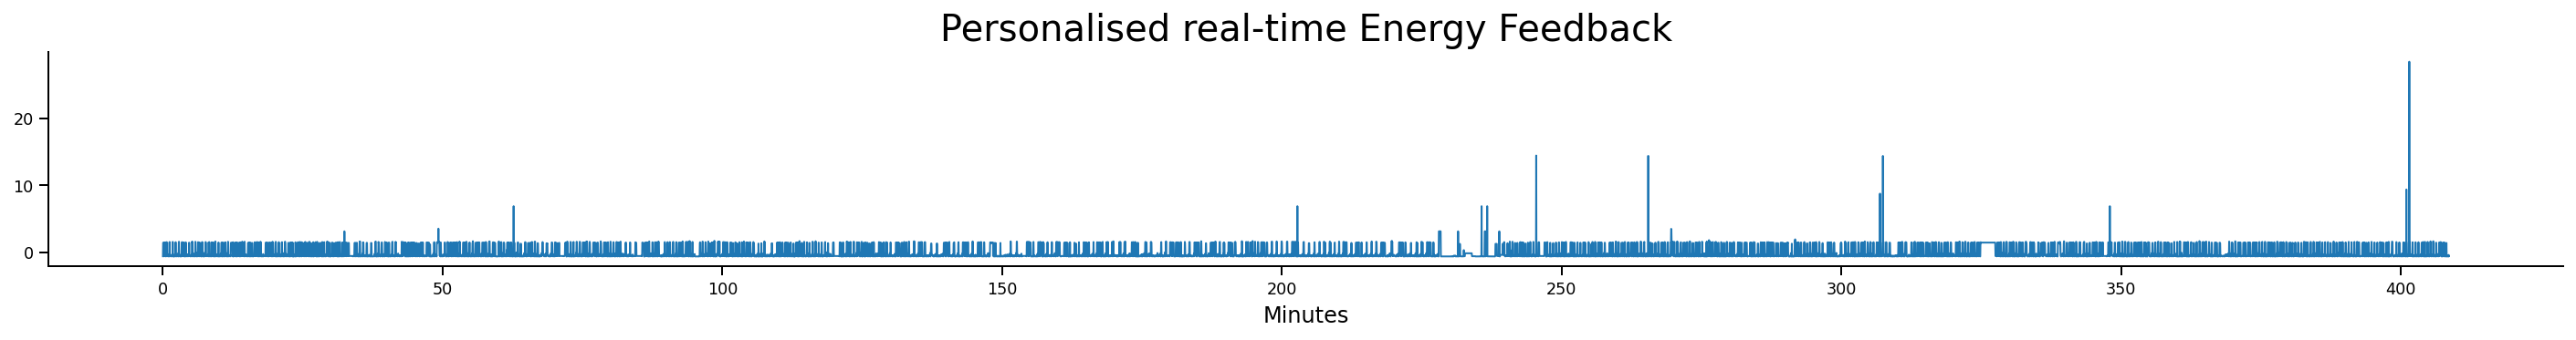

In [29]:
file = 'dishwasher.txt' # Dataset Length n:  ???
ds_name = "Personalised real-time Energy Feedback"

data = ml.read_dataset(file)

seconds_idx=np.arange(0, 245151, 24) / 600
series = pd.Series(data = data, index=seconds_idx)
series.index.name = 'Minutes'

plot_dataset(file, series, ds_name=ds_name)

Compute ks: 100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.52it/s]


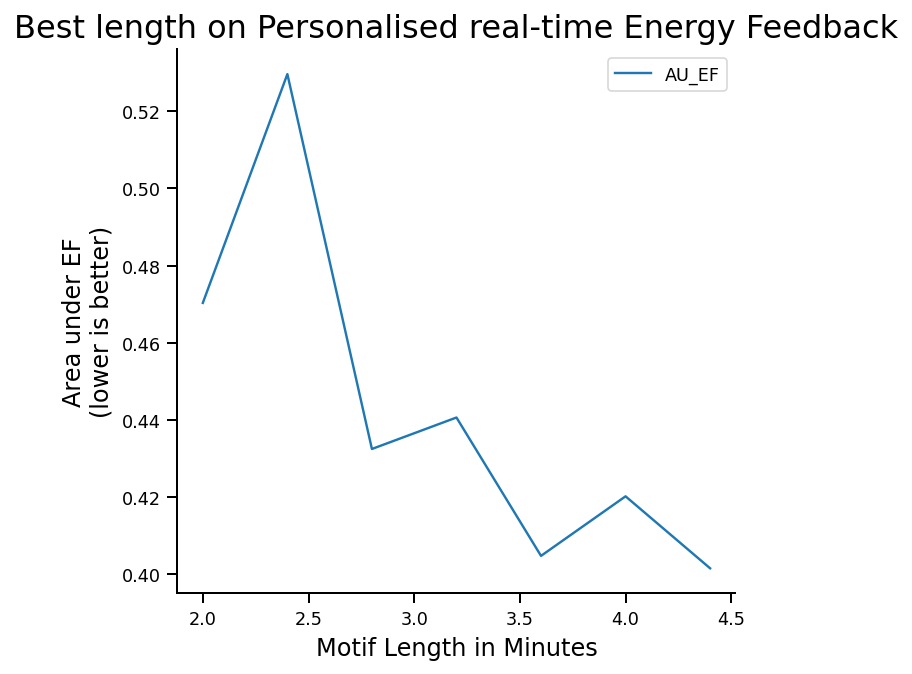

In [40]:
ks = 10
length_range = np.arange(30,120,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, 
    ds_name=ds_name)

Compute ks: 100%|████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.19it/s]


Chosen window-size: 80 Elbow Points [4 7]
Filtered Elbow Points [4, 7]


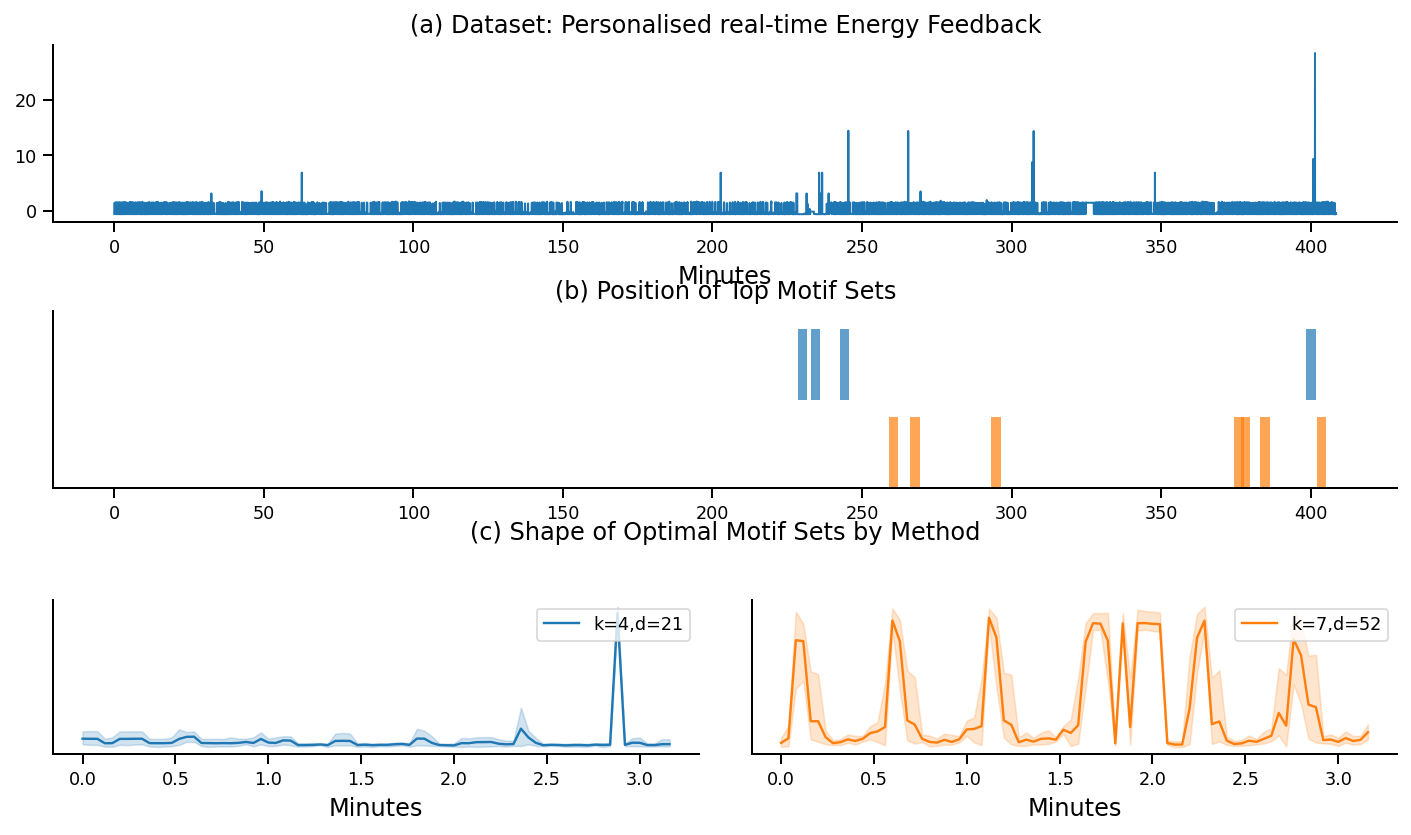

In [44]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=80, ds_name=ds_name, filter=True)

<hr>

# Italian Power Demand

<!--
> The dataset is 3 years of Italian power demand data which represents the hourly electrical power demand of a small Italian city for 3 years beginning on Jan 1st 1995 and ending on May 31th 1998. What we want here is to summarize this dataset, showing “Snippets” of data. Snippets are representative patterns present in the data, not rare events like discords, neither (almost) perfectly similar as motifs. [1]
--> 

### References
- [1] https://www.cs.ucr.edu/~eamonn/100_Time_Series_Data_Mining_Questions__with_Answers.pdf

Dataset Original Length n:  29930
Dataset Sampled Length n:  14965
Dataset Length n:  14965


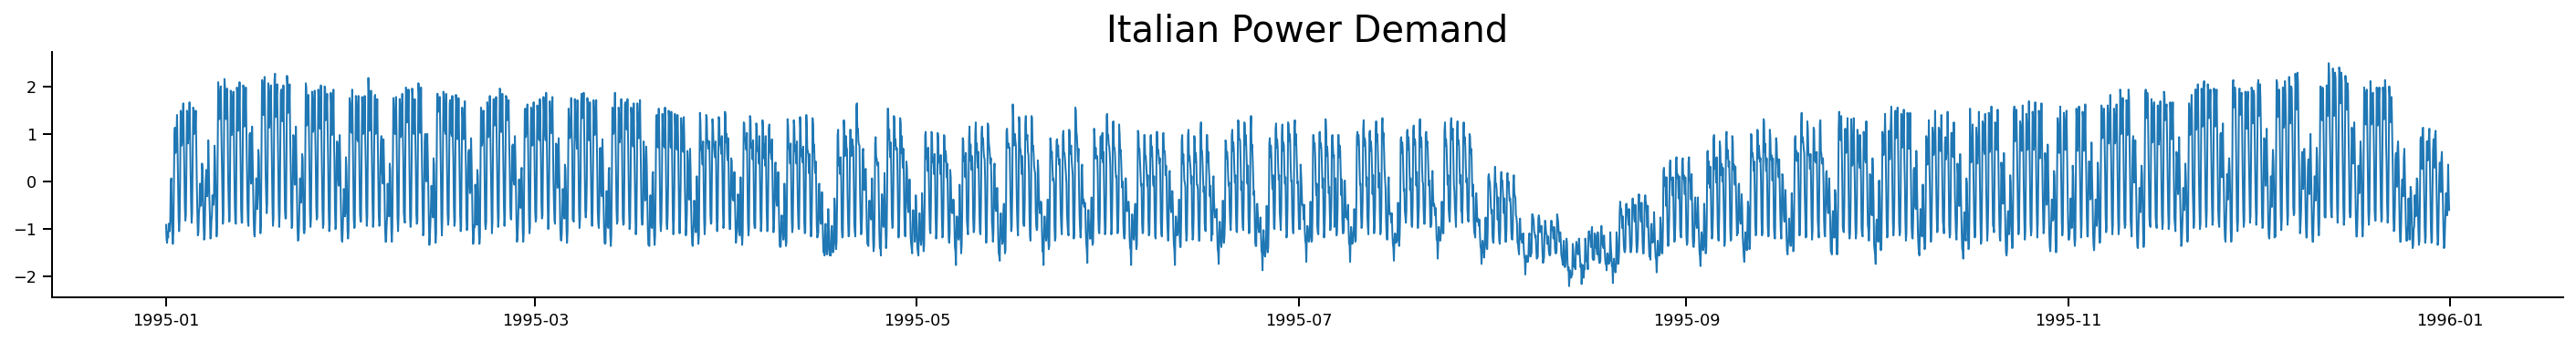

In [46]:
file = 'italianpowerdemand.csv' # Dataset Length n:  ???
ds_name = "Italian Power Demand"
ks = 20
length_range = np.arange(10,120,10)

data = ml.read_dataset(file)
factor = 2
date_time_idx=(pd.date_range(start='1/1/1995', end='06/01/1998', freq ='1h'))
series = pd.Series(data = data, index=date_time_idx[::factor][:len(data)])

print("Dataset Length n: ", len(data))

series = series[:365*int(24/factor)]
plot_dataset(file, series, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:01<00:00, 13.93it/s]


Chosen window-size: 84 Elbow Points [ 5  7 10 16]
Filtered Elbow Points [7, 10, 16]


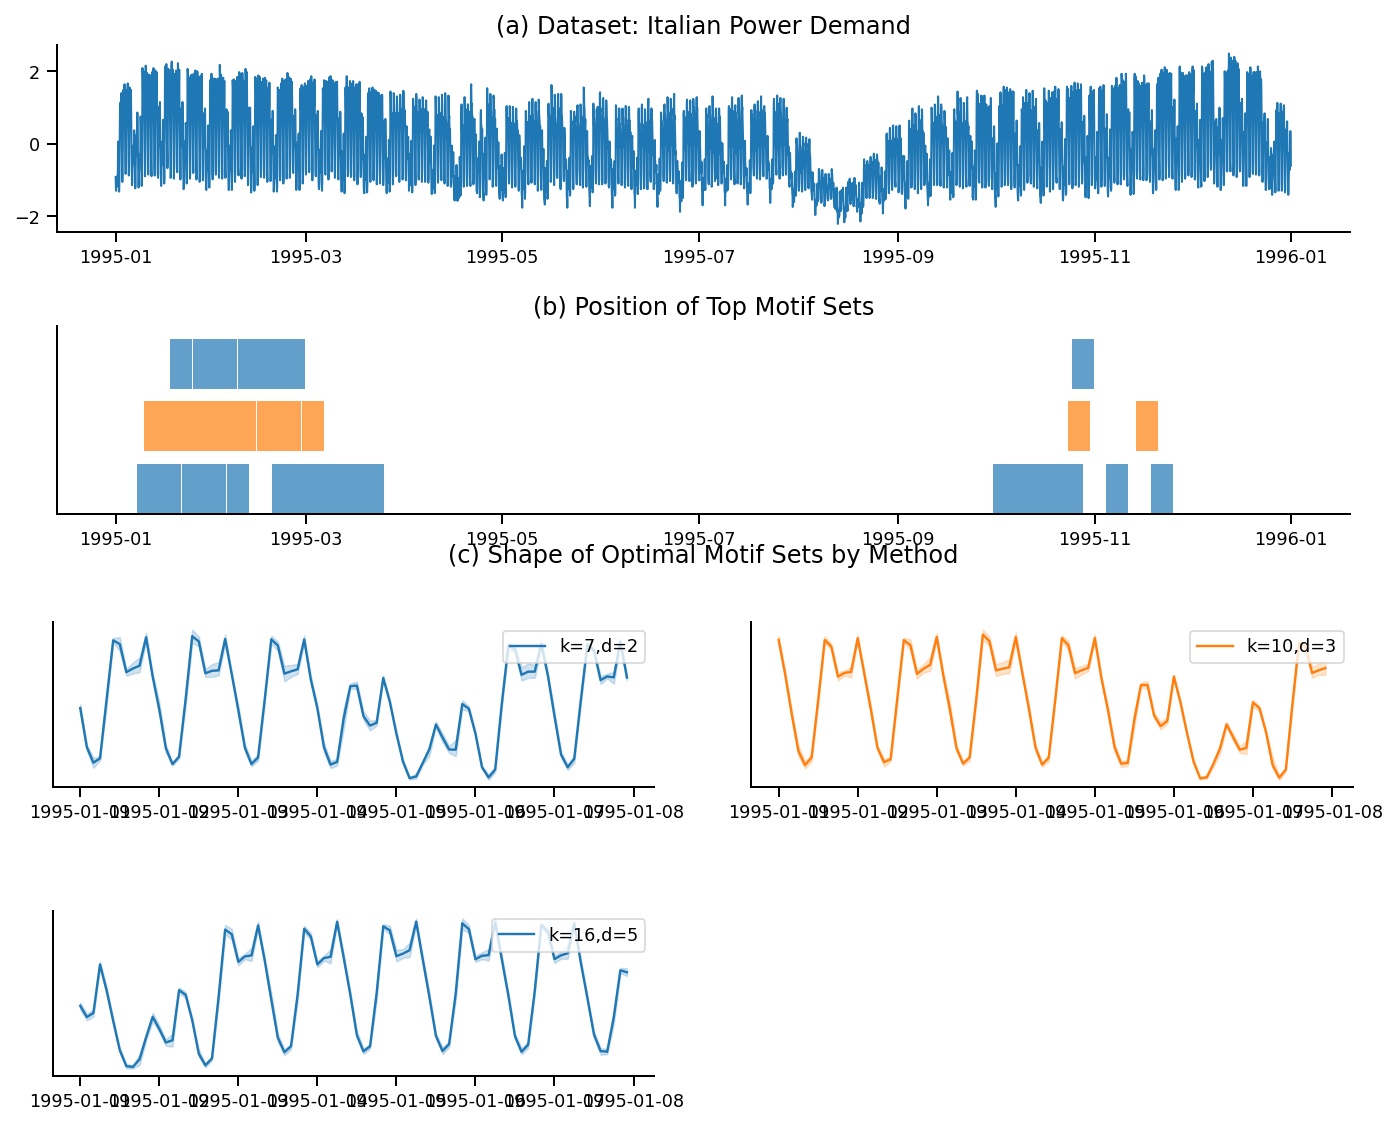

In [47]:
# weekly
weekly = int(24 / factor * 7)
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=weekly, ds_name=ds_name)

<hr>

# Walk Jog Run


### References 
- https://link.springer.com/article/10.1007/s10618-018-0589-3

Dataset Original Length n:  10000
Dataset Sampled Length n:  10000
Dataset Length n:  10000


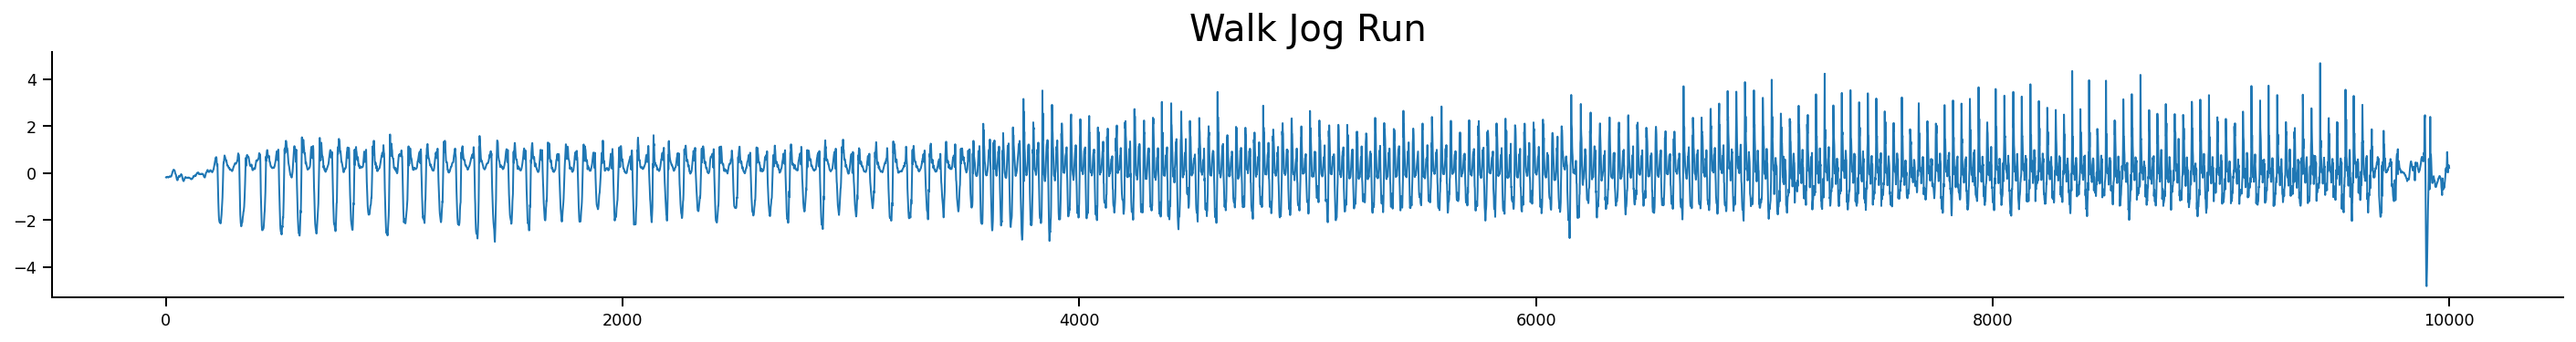

In [57]:
file = "walk-jog-run.txt"
ds_name="Walk Jog Run"

data = ml.read_dataset(file)
print("Dataset Length n: ", len(data))

plot_dataset(file, data, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:01<00:00,  8.60it/s]


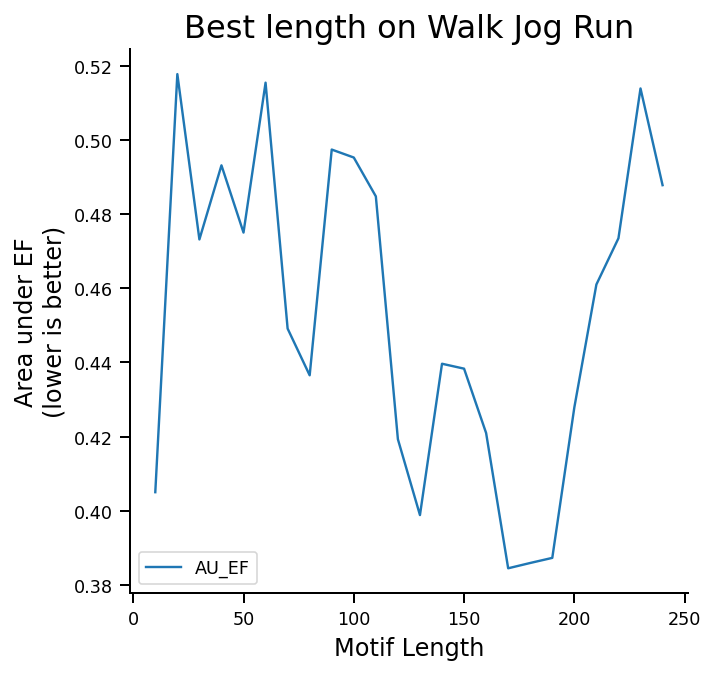

In [58]:
ks = 15
length_range = np.arange(10,250,10)
motif_length = plot_motif_length_selection(
    ks, data, file, motif_length_range=length_range, 
    ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.51it/s]


Chosen window-size: 180 Elbow Points [ 6 10 12]
Filtered Elbow Points [6, 12]


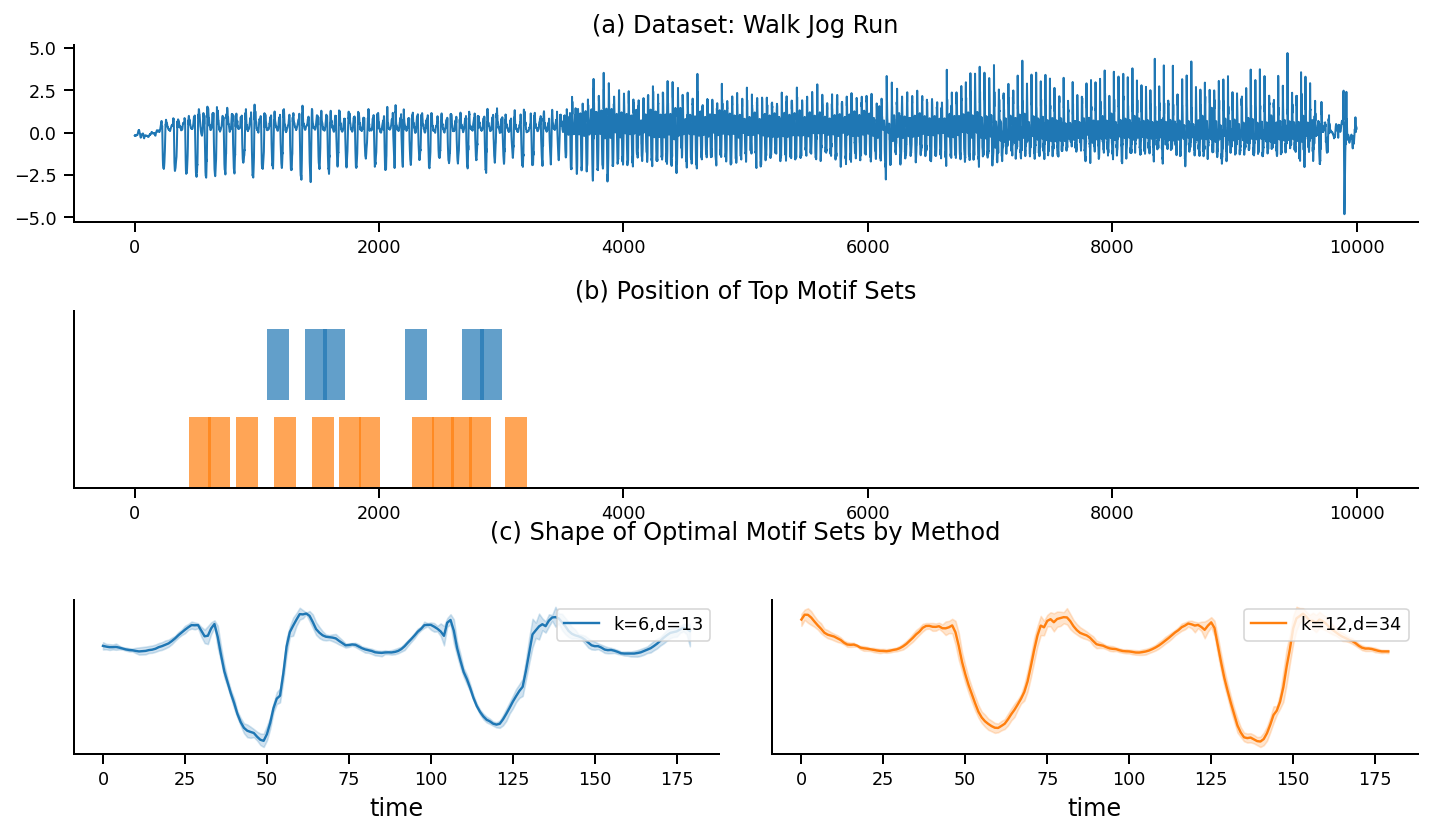

In [59]:
dists, candidates, elbow_points = plot_elbow(
    ks, data, file, 
    motif_length=180, ds_name=ds_name)

<hr>

# Dataset Epilepsy


## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

Dataset Original Length n:  14036
Dataset Sampled Length n:  14036
Dataset Length n:  14036


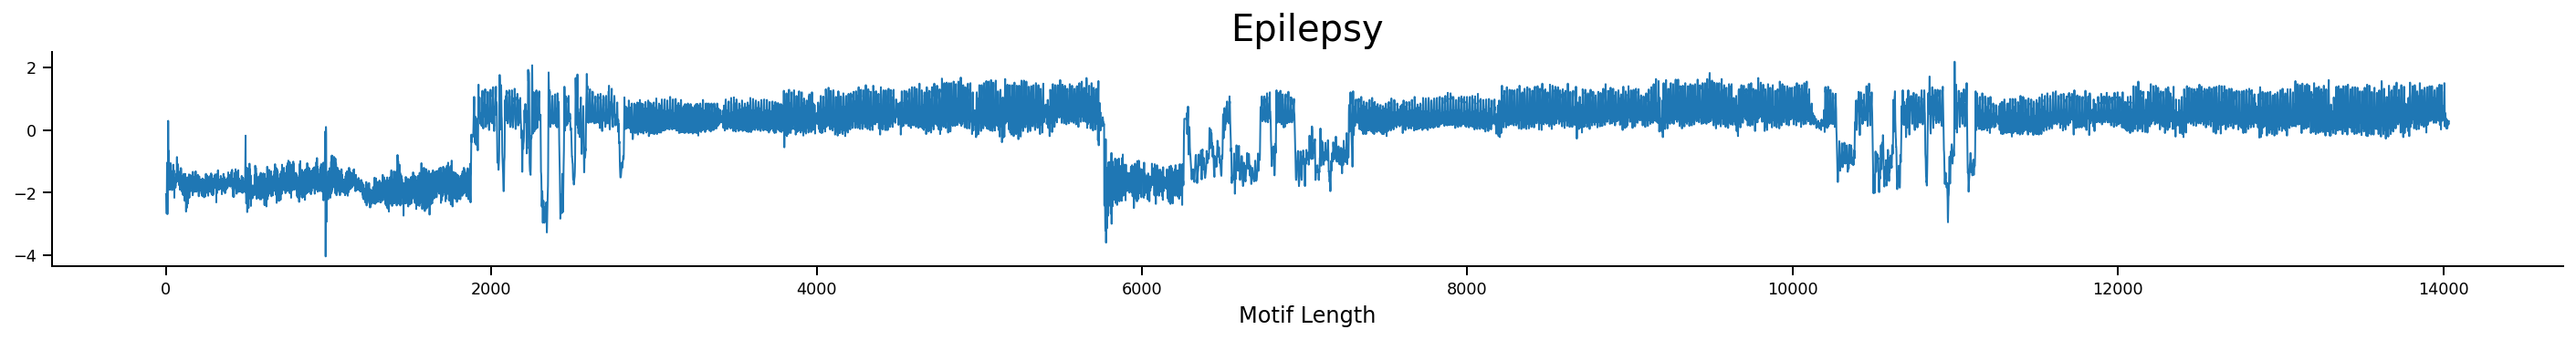

In [63]:
file = "epilepsy_walking_subLen_16.mat.csv" 
ds_name="Epilepsy"

data = ml.read_dataset_with_index("../mat2/"+file) 
print("Dataset Length n: ", len(data))

series = pd.Series(data = data.values, index=data.index)
series.index.name = 'Motif Length'

plot_dataset(file, series, ds_name=ds_name)

Compute ks: 100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.93it/s]


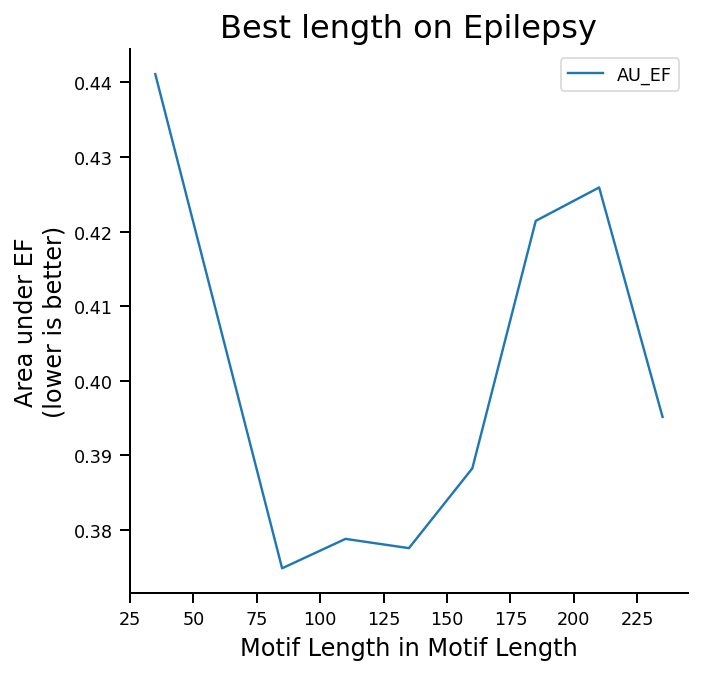

In [65]:
ks = 10
length_range = np.arange(10,251,25)
motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 28/28 [00:42<00:00,  1.53s/it]


Chosen window-size: 135 Elbow Points [ 7 14 19 24 26 28]
Filtered Elbow Points [7, 26, 28]


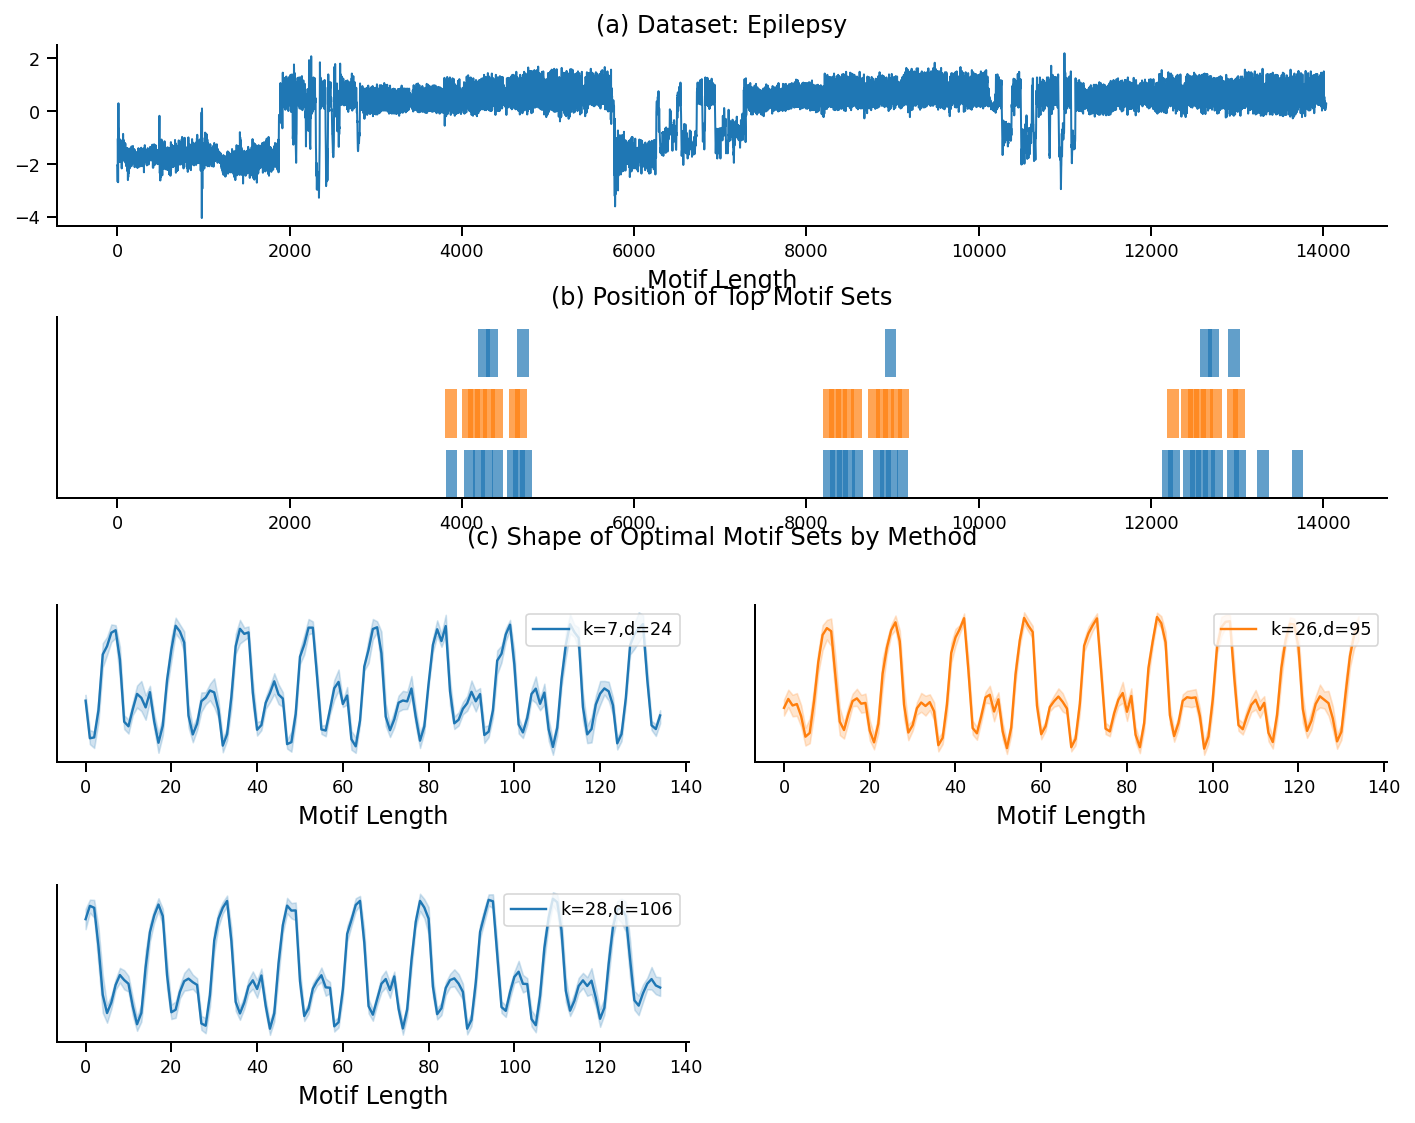

In [66]:
dists, candidates, elbow_points = plot_elbow(
    30, series, file, 
    motif_length=135, ds_name=ds_name)

Compute ks: 100%|████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.81it/s]


Chosen window-size: 30 Elbow Points [4 6]
Filtered Elbow Points [4, 6]


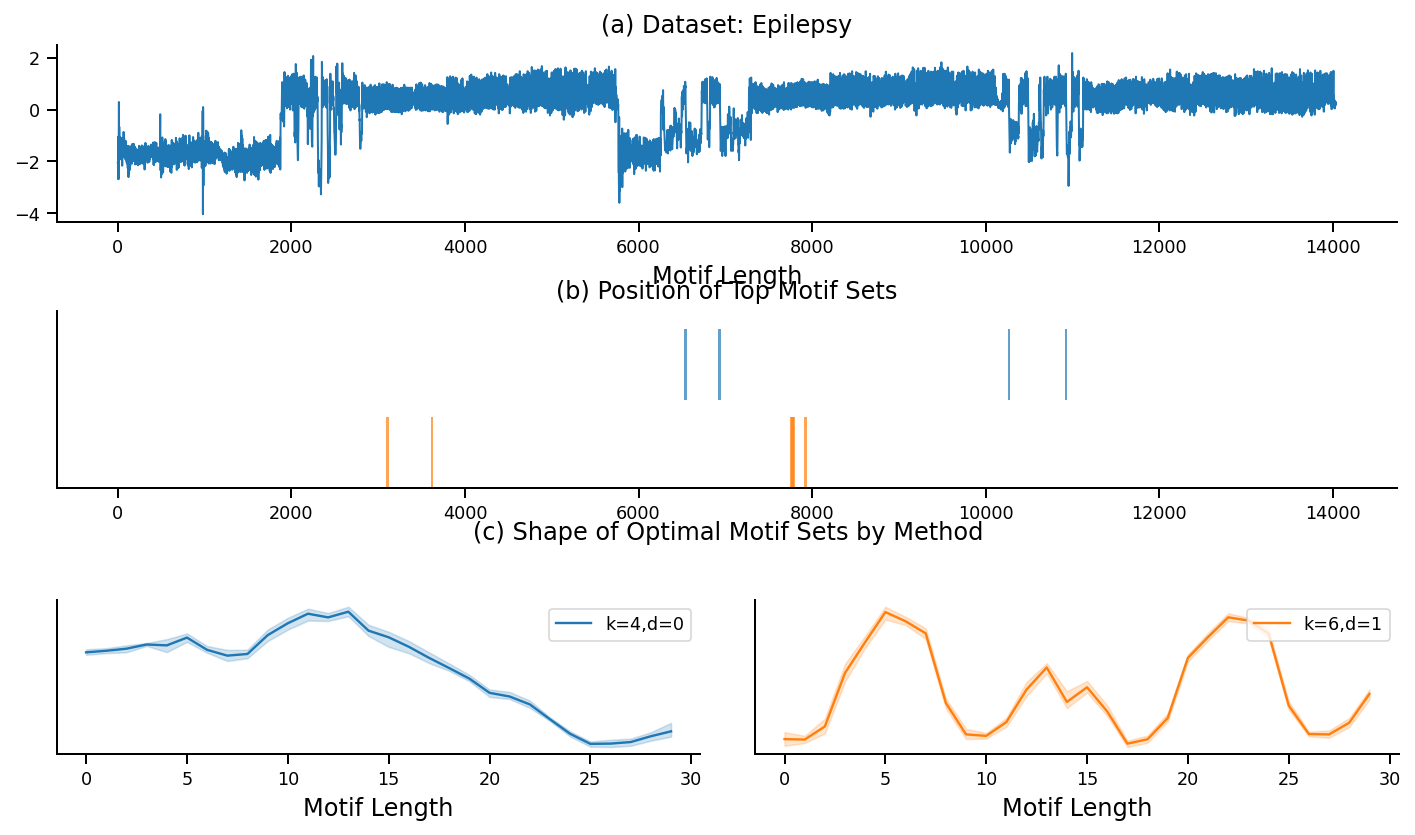

In [67]:
dists2, candidates2, elbow_points2 = plot_elbow(
    10, 
    series, 
    file, 
    motif_length=30,
    ds_name=ds_name)

<hr>